In [1]:
# Pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados do arquivo CSV
caminho = 'C:\\FCD\\relatorio_meta.csv'
data = pd.read_csv(caminho)

In [2]:
data.head(3)

,Nome da campanha,Nome do conjunto de anúncios,Nome do anúncio,Idade,Gênero,Status de veiculação,Nível de veiculação,Alcance,Impressões,Frequência,...,Valor usado (BRL),Custo por resultado,Início,Término,Cliques no link,CPC (custo por clique no link),CPM (custo por 1.000 impressões),CTR (taxa de cliques no link),Início dos relatórios,Término dos relatórios
0,Campanha 10,[AMPLO] - Look a Like,Store collection Todos os produtos - Vendas do...,35-44,female,active,ad,14961,37228,2.488336,...,288.482991,41.211856,2023-10-06,Contínuo,991.0,0.291103,7.749086,2.661975,2024-01-01,2024-01-26
1,Campanha 10,[AMPLO] - Look a Like,Store collection Todos os produtos - Vendas do...,45-54,female,active,ad,8113,19713,2.429804,...,216.559752,24.062195,2023-10-06,Contínuo,767.0,0.282346,10.985631,3.890833,2024-01-01,2024-01-26
2,Campanha 11,[TESTE - 21/09] Tucano Viagens e verão - OK,Carrossel - Lilly,35-44,female,active,ad,10311,21195,2.055572,...,166.419515,27.736586,2023-10-06,Contínuo,291.0,0.571888,7.851829,1.372965,2024-01-01,2024-01-26


In [3]:
data.columns

Index(['Nome da campanha', 'Nome do conjunto de anúncios', 'Nome do anúncio',
       'Idade', 'Gênero', 'Status de veiculação', 'Nível de veiculação',
       'Alcance', 'Impressões', 'Frequência', 'Configuração de atribuição',
       'Tipo de resultado', 'Resultados', 'Valor usado (BRL)',
       'Custo por resultado', 'Início', 'Término', 'Cliques no link',
       'CPC (custo por clique no link)', 'CPM (custo por 1.000 impressões)',
       'CTR (taxa de cliques no link)', 'Início dos relatórios',
       'Término dos relatórios'],
      dtype='object')

In [4]:
v_num = ['Resultados',
        'Alcance',
        'Impressões',
        'Custo por resultado',
        'Valor usado (BRL)',
        'CPM (custo por 1.000 impressões)',
        'Cliques no link',
        'CTR (taxa de cliques no link)']

In [5]:
v_cat = ['Nome da campanha',
        'Nome do conjunto de anúncios',
        'Nome do anúncio',
        'Gênero',
        'Tipo de resultado',
        'Idade']

In [6]:
data[v_num].describe()

,Resultados,Alcance,Impressões,Custo por resultado,Valor usado (BRL),CPM (custo por 1.000 impressões),Cliques no link,CTR (taxa de cliques no link)
count,85.000000,294.000000,294.000000,85.000000,294.000000,292.000000,205.000000,205.000000
mean,2.447059,895.721088,2400.850340,28.140098,21.703946,12.527312,59.780488,2.694439
std,1.924194,1926.263526,4886.999492,25.778178,38.644791,10.353006,116.230567,3.443101
min,1.000000,0.000000,0.000000,0.270000,0.000000,0.000000,1.000000,0.142776
25%,1.000000,10.000000,26.250000,12.251335,0.280552,6.162388,3.000000,0.853789
50%,2.000000,97.000000,304.000000,23.729594,3.659646,9.781040,16.000000,1.767285
75%,3.000000,843.250000,2236.750000,36.869160,25.047932,15.291191,68.000000,3.333333
max,10.000000,14961.000000,37228.000000,149.280595,288.482991,81.492216,991.000000,33.333333


In [7]:
data[v_cat].describe()

,Nome da campanha,Nome do conjunto de anúncios,Nome do anúncio,Gênero,Tipo de resultado,Idade
count,294,294,294,294,85,294
unique,9,17,18,3,1,7
top,Campanha 11,Advantage,Store collection Todos os produtos - Vendas do...,female,Compras no site,35-44
freq,77,46,58,112,85,64


In [8]:
# Configurações para gráficos
sns.set(style="whitegrid")

'C:\\FCD\\grafico_valor_usado.png'

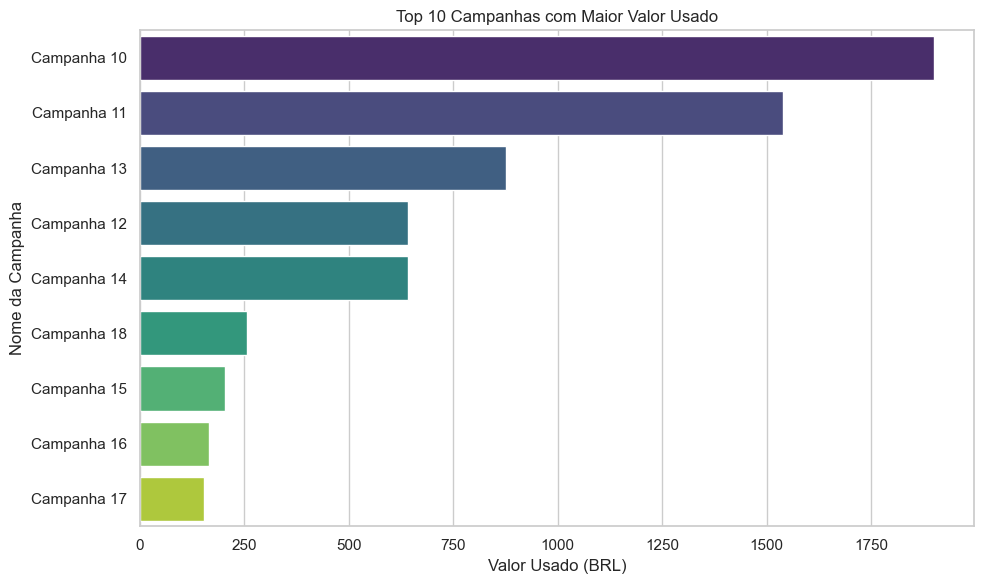

In [9]:
# 1. Campanhas com maior valor usado
valor_usado_por_campanha = data.groupby('Nome da campanha')['Valor usado (BRL)'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
valor_usado_plot = sns.barplot(x=valor_usado_por_campanha.values, y=valor_usado_por_campanha.index, palette="viridis")
plt.title('Top 10 Campanhas com Maior Valor Usado')
plt.xlabel('Valor Usado (BRL)')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_valor_usado = 'C:\FCD\grafico_valor_usado.png'
plt.savefig(file_path_valor_usado)

file_path_valor_usado

'C:\\FCD\\grafico_valor_usado.png'

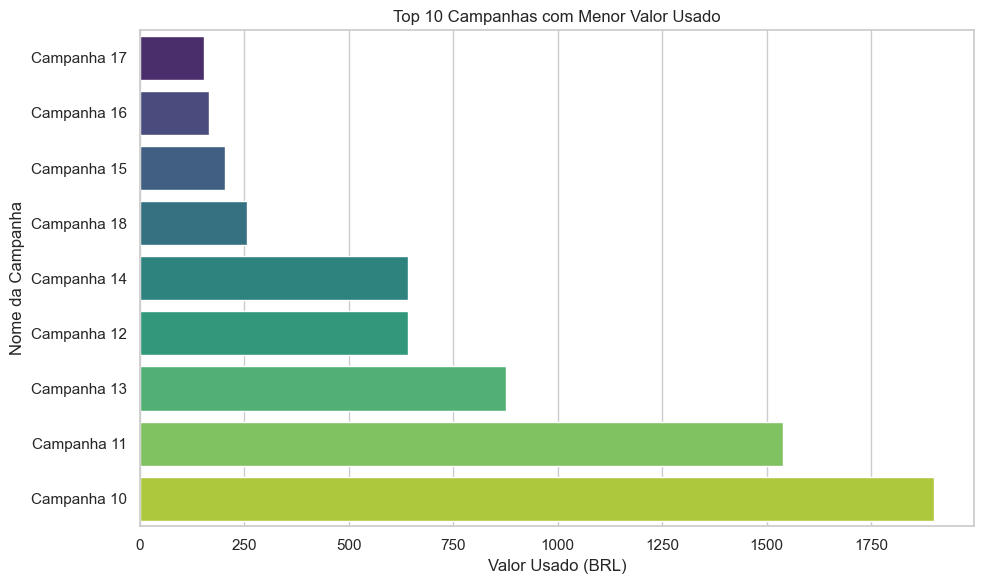

In [10]:
# 2. Campanhas com menor valor usado
valor_usado_por_campanha = data.groupby('Nome da campanha')['Valor usado (BRL)'].sum().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
valor_usado_plot = sns.barplot(x=valor_usado_por_campanha.values, y=valor_usado_por_campanha.index, palette="viridis")
plt.title('Top 10 Campanhas com Menor Valor Usado')
plt.xlabel('Valor Usado (BRL)')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_valor_usado = 'C:\FCD\grafico_valor_usado.png'
plt.savefig(file_path_valor_usado)

file_path_valor_usado

'C:\\FCD\\grafico_resultados.png'

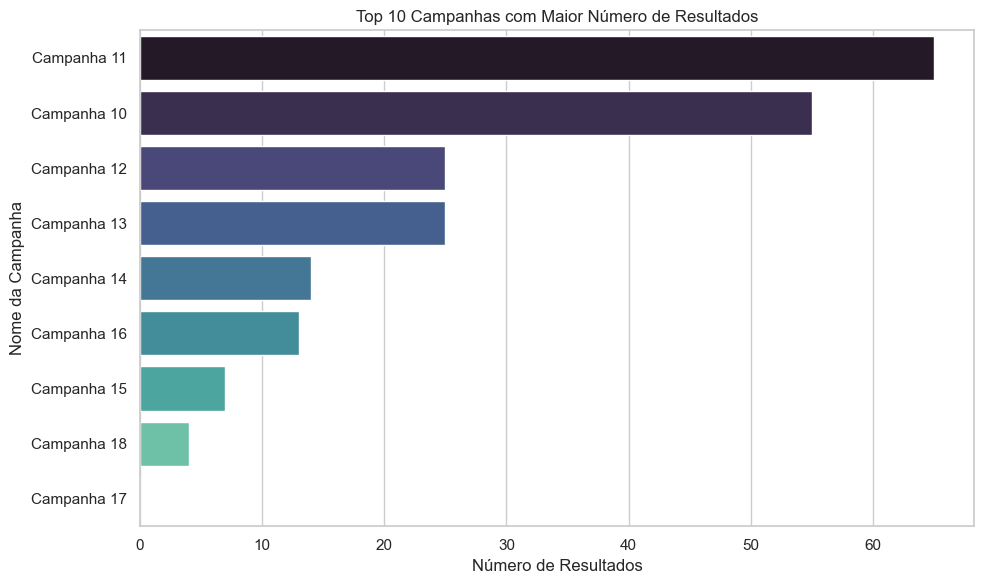

In [11]:
# 2. Campanhas com maior número de resultados (excluindo tipos de resultado específicos)
data_filtrada = data[~data['Tipo de resultado'].isin(['ThruPlay', 'Cliques no link'])]
resultados_por_campanha = data_filtrada.groupby('Nome da campanha')['Resultados'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
resultados_plot = sns.barplot(x=resultados_por_campanha.values, y=resultados_por_campanha.index, palette="mako")
plt.title('Top 10 Campanhas com Maior Número de Resultados')
plt.xlabel('Número de Resultados')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\FCD\grafico_resultados.png'
plt.savefig(file_path_resultados)

file_path_resultados

'C:\\FCD\\grafico_resultados.png'

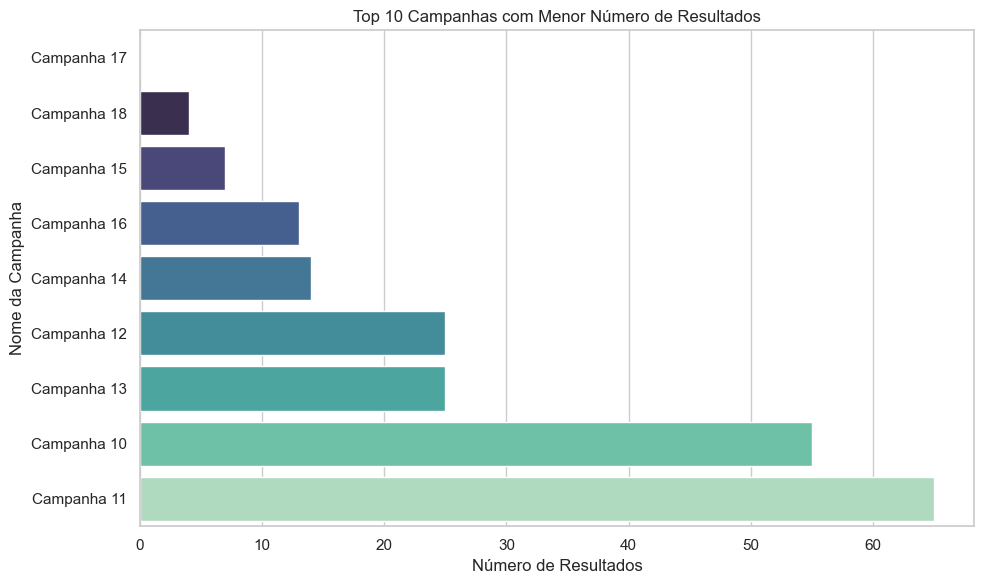

In [12]:
# 2. Campanhas com menor número de resultados (excluindo tipos de resultado específicos)
data_filtrada = data[~data['Tipo de resultado'].isin(['ThruPlay', 'Cliques no link'])]
resultados_por_campanha = data_filtrada.groupby('Nome da campanha')['Resultados'].sum().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
resultados_plot = sns.barplot(x=resultados_por_campanha.values, y=resultados_por_campanha.index, palette="mako")
plt.title('Top 10 Campanhas com Menor Número de Resultados')
plt.xlabel('Número de Resultados')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\FCD\grafico_resultados.png'
plt.savefig(file_path_resultados)

file_path_resultados

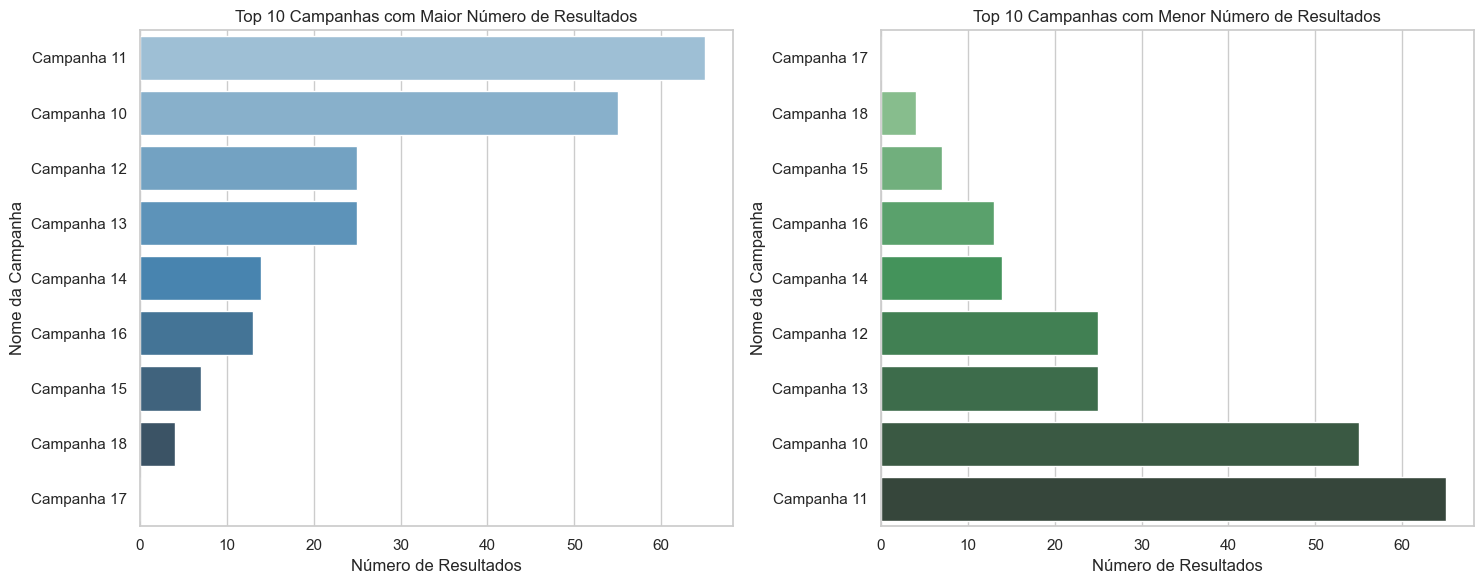

In [13]:
# Calculando o número total de resultados para cada campanha
resultados_por_campanha = data.groupby('Nome da campanha')['Resultados'].sum()

# Separando as campanhas com maior e menor número de resultados
top_campanhas_maior_resultado = resultados_por_campanha.nlargest(10)
top_campanhas_menor_resultado = resultados_por_campanha.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico das campanhas com maior número de resultados
sns.barplot(ax=ax1, x=top_campanhas_maior_resultado.values, y=top_campanhas_maior_resultado.index, palette="Blues_d")
ax1.set_title('Top 10 Campanhas com Maior Número de Resultados')
ax1.set_xlabel('Número de Resultados')
ax1.set_ylabel('Nome da Campanha')

# Gráfico das campanhas com menor número de resultados
sns.barplot(ax=ax2, x=top_campanhas_menor_resultado.values, y=top_campanhas_menor_resultado.index, palette="Greens_d")
ax2.set_title('Top 10 Campanhas com Menor Número de Resultados')
ax2.set_xlabel('Número de Resultados')
ax2.set_ylabel('Nome da Campanha')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

'C:\\FCD\\grafico_custo_por_resultado.png'

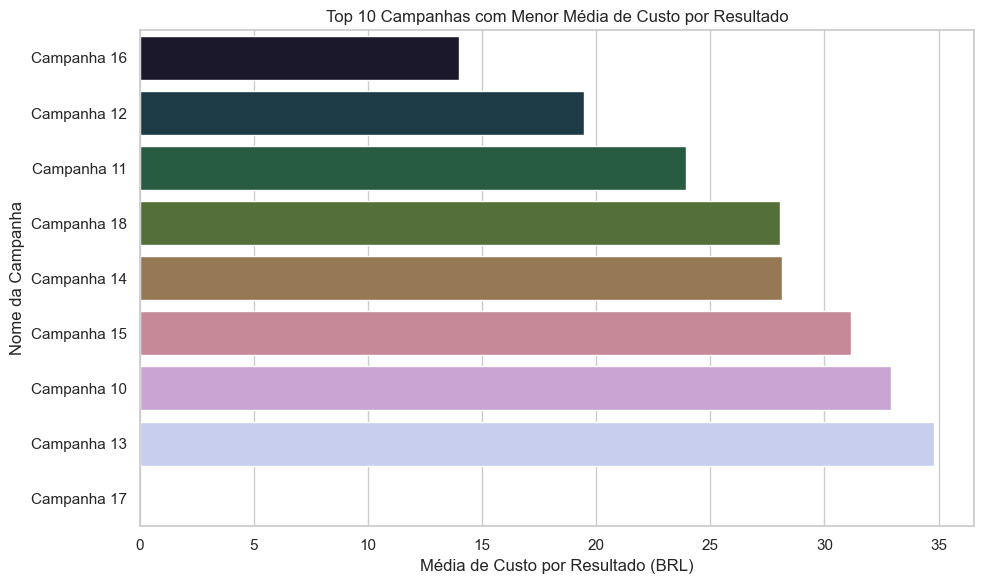

In [46]:
# 3. Campanhas com menor média de custo por resultado (excluindo tipos de resultado específicos)
custo_por_resultado_medio = data_filtrada.groupby('Nome da campanha')['Custo por resultado'].mean().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
custo_plot1 = sns.barplot(x=custo_por_resultado_medio.values, y=custo_por_resultado_medio.index, palette="cubehelix")
plt.title('Top 10 Campanhas com Menor Média de Custo por Resultado')
plt.xlabel('Média de Custo por Resultado (BRL)')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_custo = 'C:\FCD\grafico_custo_por_resultado.png'
plt.savefig(file_path_custo)

file_path_custo

'C:\\FCD\\grafico_custo_por_resultado.png'

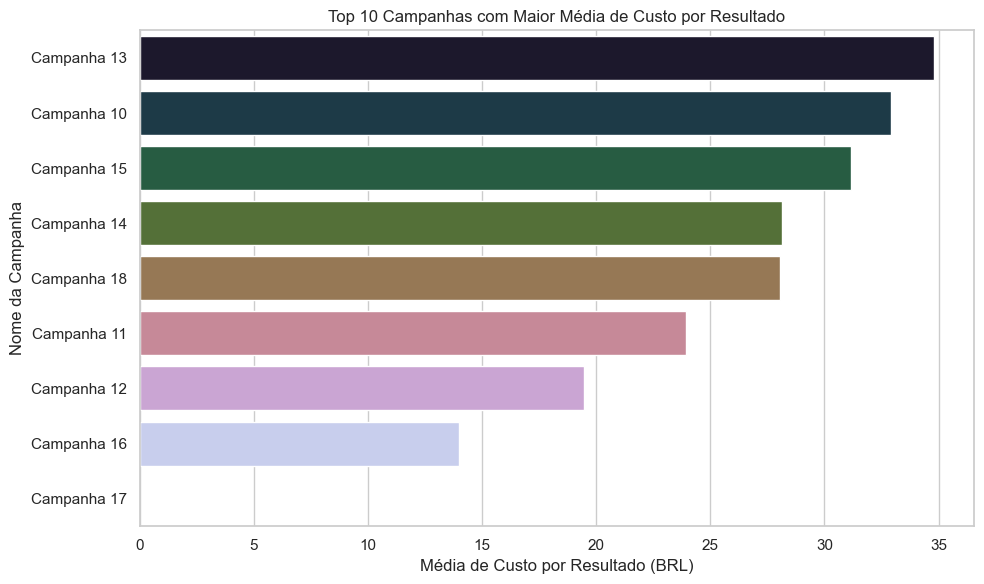

In [15]:
# 3. Campanhas com maior média de custo por resultado (excluindo tipos de resultado específicos)
custo_por_resultado_medio = data_filtrada.groupby('Nome da campanha')['Custo por resultado'].mean().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
custo_plot2 = sns.barplot(x=custo_por_resultado_medio.values, y=custo_por_resultado_medio.index, palette="cubehelix")
plt.title('Top 10 Campanhas com Maior Média de Custo por Resultado')
plt.xlabel('Média de Custo por Resultado (BRL)')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_custo = 'C:\FCD\grafico_custo_por_resultado.png'
plt.savefig(file_path_custo)

file_path_custo

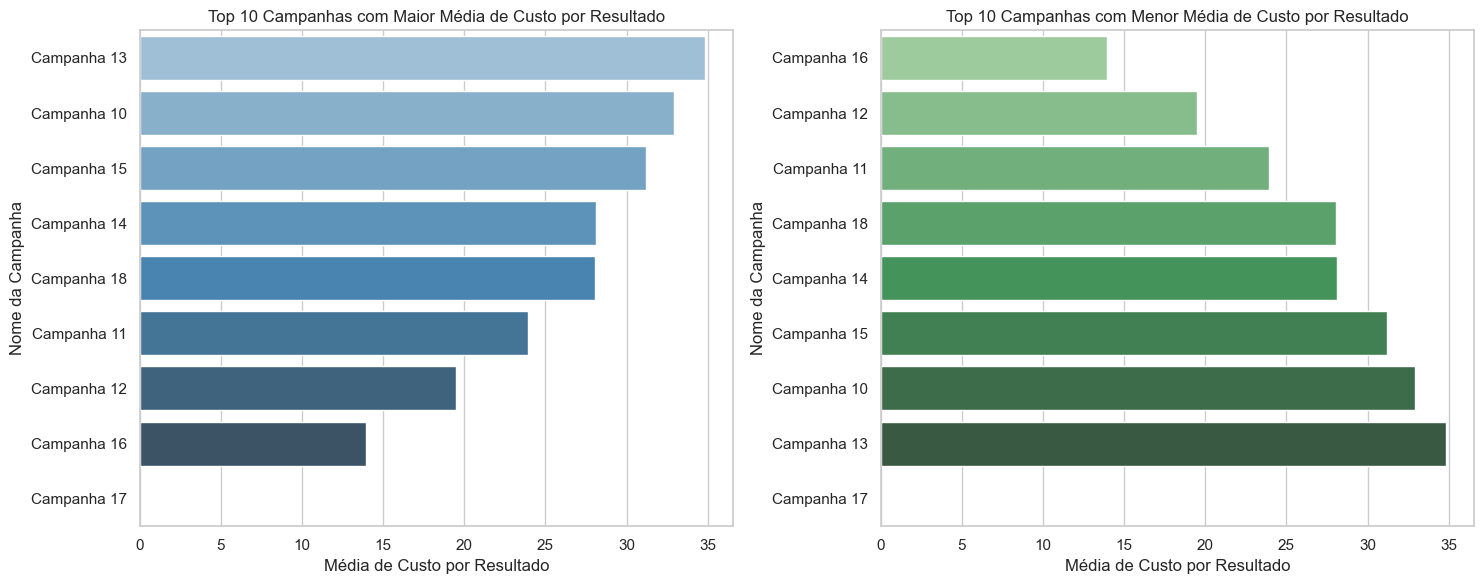

In [16]:


# Calculando a média de custo por resultado para cada campanha
custo_medio_por_campanha = data.groupby('Nome da campanha')['Custo por resultado'].mean()

# Separando as campanhas com maior e menor média de custo por resultado
top_campanhas_maior_custo = custo_medio_por_campanha.nlargest(10)
top_campanhas_menor_custo = custo_medio_por_campanha.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico das campanhas com maior média de custo por resultado
sns.barplot(ax=ax1, x=top_campanhas_maior_custo.values, y=top_campanhas_maior_custo.index, palette="Blues_d")
ax1.set_title('Top 10 Campanhas com Maior Média de Custo por Resultado')
ax1.set_xlabel('Média de Custo por Resultado')
ax1.set_ylabel('Nome da Campanha')

# Gráfico das campanhas com menor média de custo por resultado
sns.barplot(ax=ax2, x=top_campanhas_menor_custo.values, y=top_campanhas_menor_custo.index, palette="Greens_d")
ax2.set_title('Top 10 Campanhas com Menor Média de Custo por Resultado')
ax2.set_xlabel('Média de Custo por Resultado')
ax2.set_ylabel('Nome da Campanha')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

'C:\\FCD\\grafico_ctr.png'

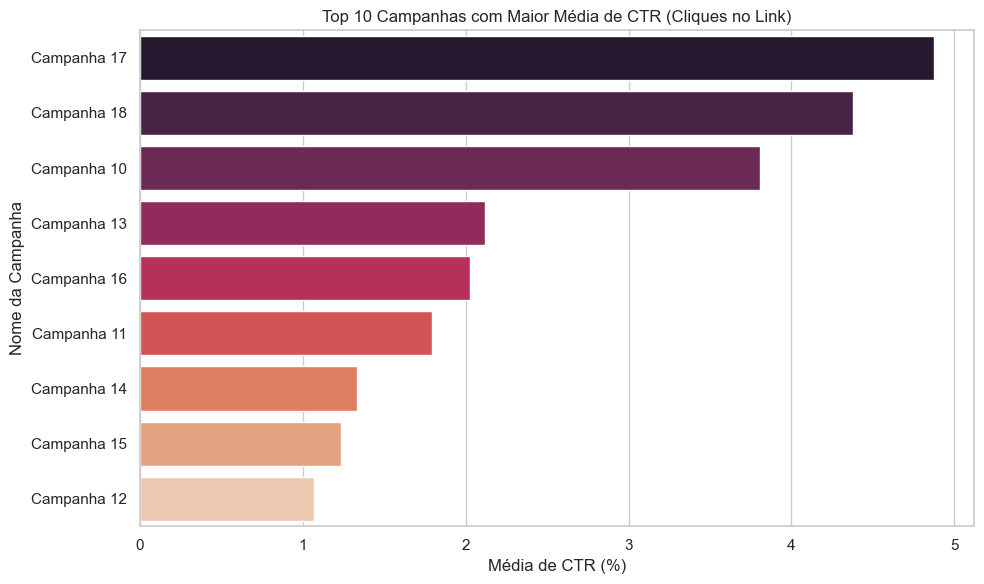

In [48]:
# 4. Campanhas com maior média de CTR (taxa de cliques no link)
ctr_medio_por_campanha = data.groupby('Nome da campanha')['CTR (taxa de cliques no link)'].mean().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
ctr_plot = sns.barplot(x=ctr_medio_por_campanha.values, y=ctr_medio_por_campanha.index, palette="rocket")
plt.title('Top 10 Campanhas com Maior Média de CTR (Cliques no Link)')
plt.xlabel('Média de CTR (%)')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_ctr = 'C:\FCD\grafico_ctr.png'
plt.savefig(file_path_ctr)

file_path_ctr

'C:\\FCD\\grafico_ctr.png'

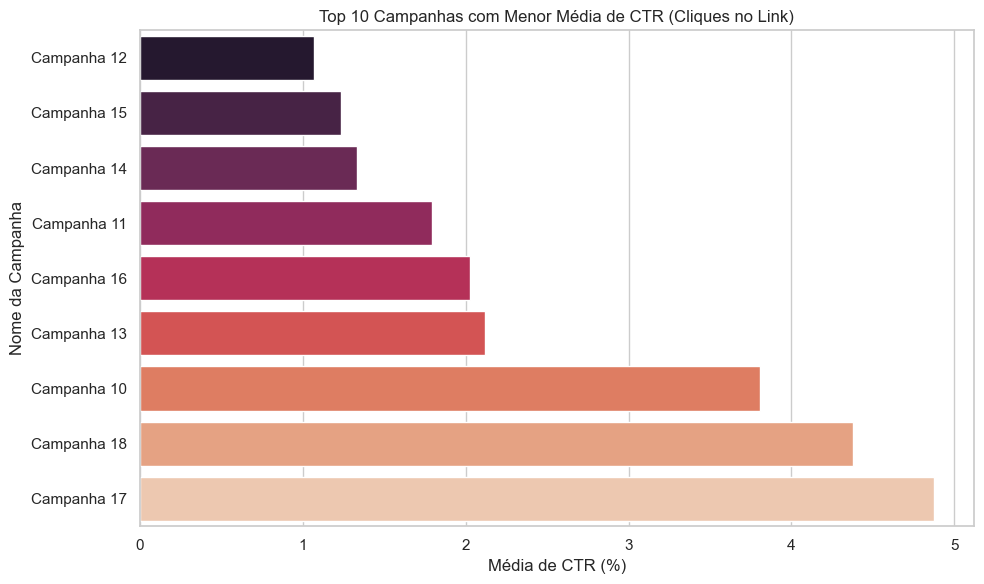

In [18]:
# 4. Campanhas com menor média de CTR (taxa de cliques no link)
ctr_medio_por_campanha = data.groupby('Nome da campanha')['CTR (taxa de cliques no link)'].mean().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
ctr_plot = sns.barplot(x=ctr_medio_por_campanha.values, y=ctr_medio_por_campanha.index, palette="rocket")
plt.title('Top 10 Campanhas com Menor Média de CTR (Cliques no Link)')
plt.xlabel('Média de CTR (%)')
plt.ylabel('Nome da Campanha')
plt.tight_layout()

# Salvando o gráfico
file_path_ctr = 'C:\FCD\grafico_ctr.png'
plt.savefig(file_path_ctr)

file_path_ctr

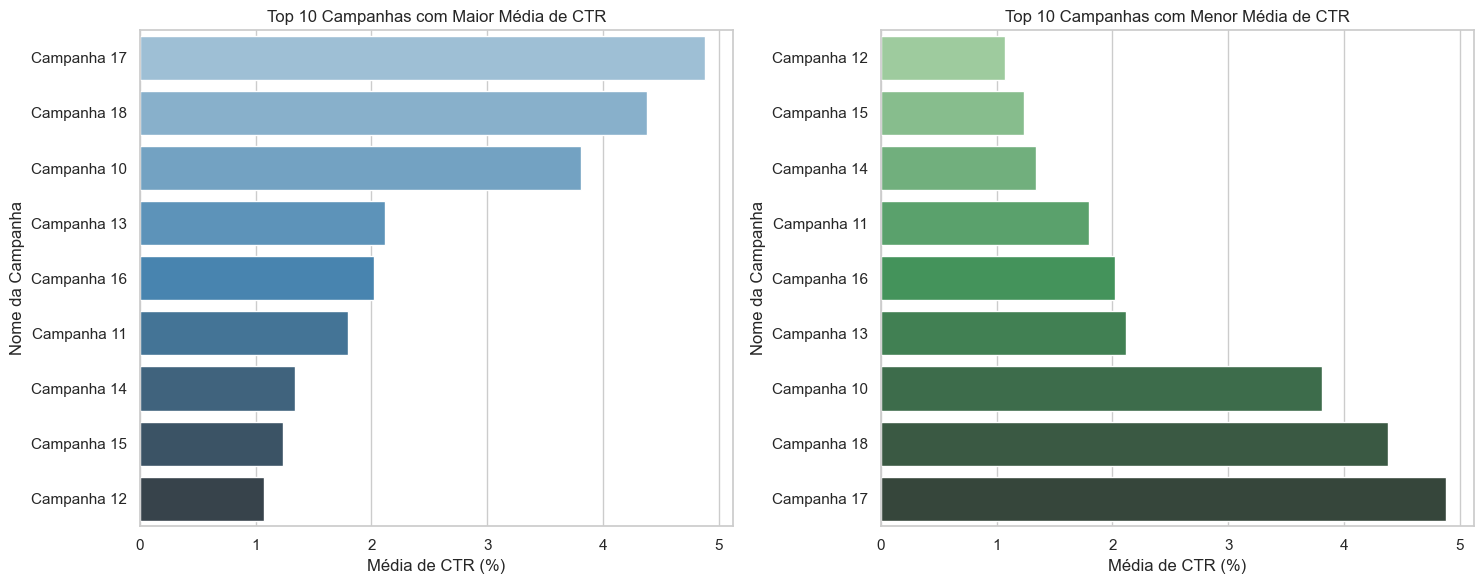

In [19]:
ctr_medio_por_campanha = data.groupby('Nome da campanha')['CTR (taxa de cliques no link)'].mean()

# Separando as campanhas com maior e menor média de CTR
top_campanhas_maior_ctr = ctr_medio_por_campanha.nlargest(10)
top_campanhas_menor_ctr = ctr_medio_por_campanha.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico das campanhas com maior média de CTR
sns.barplot(ax=ax1, x=top_campanhas_maior_ctr.values, y=top_campanhas_maior_ctr.index, palette="Blues_d")
ax1.set_title('Top 10 Campanhas com Maior Média de CTR')
ax1.set_xlabel('Média de CTR (%)')
ax1.set_ylabel('Nome da Campanha')

# Gráfico das campanhas com menor média de CTR
sns.barplot(ax=ax2, x=top_campanhas_menor_ctr.values, y=top_campanhas_menor_ctr.index, palette="Greens_d")
ax2.set_title('Top 10 Campanhas com Menor Média de CTR')
ax2.set_xlabel('Média de CTR (%)')
ax2.set_ylabel('Nome da Campanha')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

'C:\\FCD\\grafico_faixa_etaria_resultados.png'

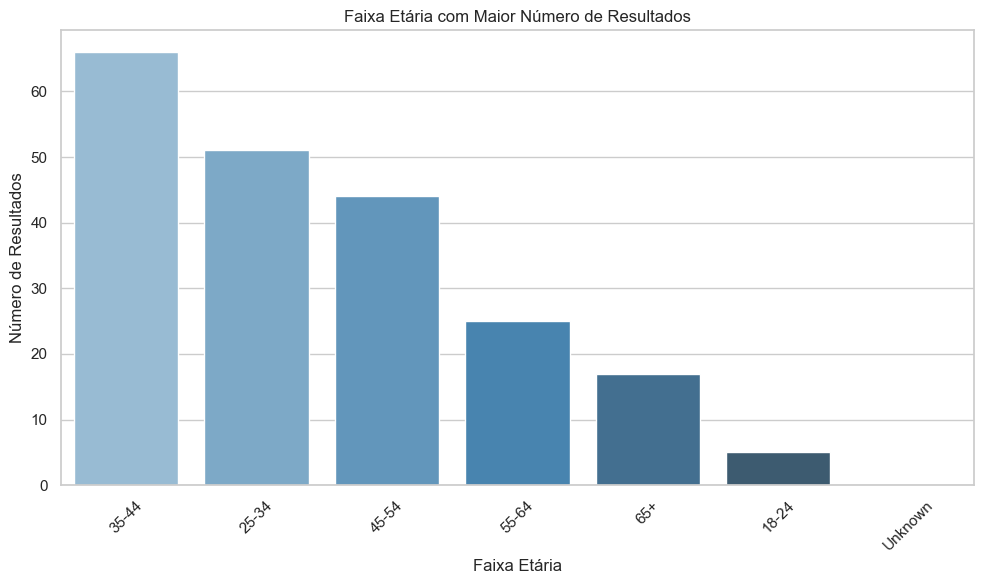

In [50]:
# 5. Faixa etária com maior número de resultados
resultados_por_idade = data.groupby('Idade')['Resultados'].sum().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(10, 6))
idade_plot = sns.barplot(x=resultados_por_idade.index, y=resultados_por_idade.values, palette="Blues_d")
plt.title('Faixa Etária com Maior Número de Resultados')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Resultados')
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando o gráfico
file_path_idade = 'C:\FCD\grafico_faixa_etaria_resultados.png'
plt.savefig(file_path_idade)

file_path_idade

'C:\\FCD\\grafico_genero_resultados.png'

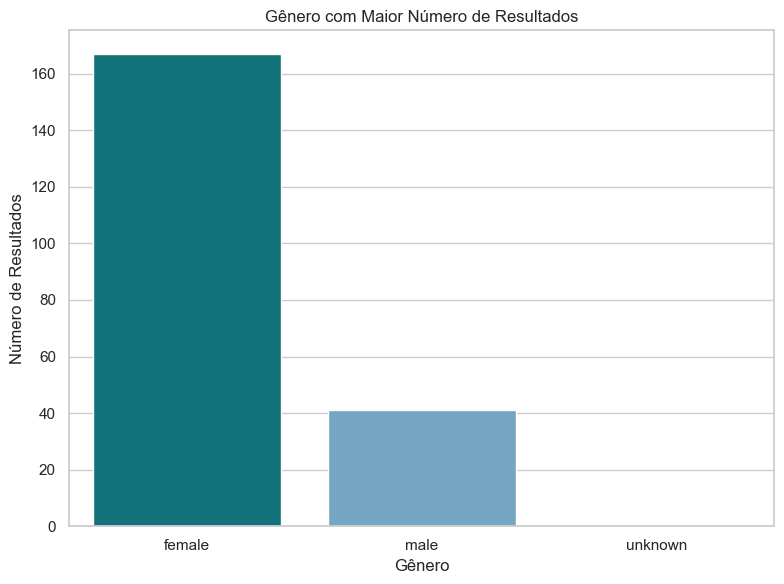

In [51]:
# 6. Gênero com maior número de resultados
resultados_por_genero = data.groupby('Gênero')['Resultados'].sum().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(8, 6))
genero_plot = sns.barplot(x=resultados_por_genero.index, y=resultados_por_genero.values, palette="PuBuGn_r")
plt.title('Gênero com Maior Número de Resultados')
plt.xlabel('Gênero')
plt.ylabel('Número de Resultados')
plt.tight_layout()

# Salvando o gráfico
file_path_genero = 'C:\FCD\grafico_genero_resultados.png'
plt.savefig(file_path_genero)

file_path_genero

'C:\\FCD\\grafico_publico_resultados.png'

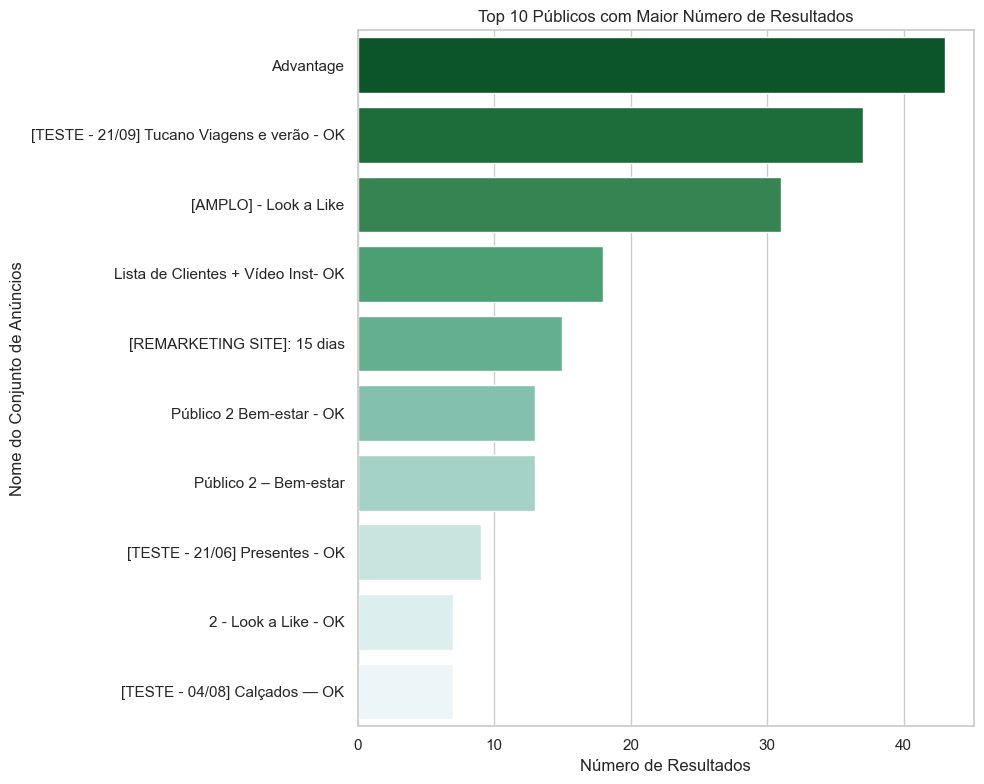

In [53]:
#3. Público com maior número de resultados
resultados_por_publico = data.groupby('Nome do conjunto de anúncios')['Resultados'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
publico_plot = sns.barplot(x=resultados_por_publico.values, y=resultados_por_publico.index, palette="BuGn_r")
plt.title('Top 10 Públicos com Maior Número de Resultados')
plt.xlabel('Número de Resultados')
plt.ylabel('Nome do Conjunto de Anúncios')
plt.tight_layout()

# Salvando o gráfico
file_path_publico = 'C:\FCD\grafico_publico_resultados.png'
plt.savefig(file_path_publico)

file_path_publico

'C:\\FCD\\grafico_publico_resultados.png'

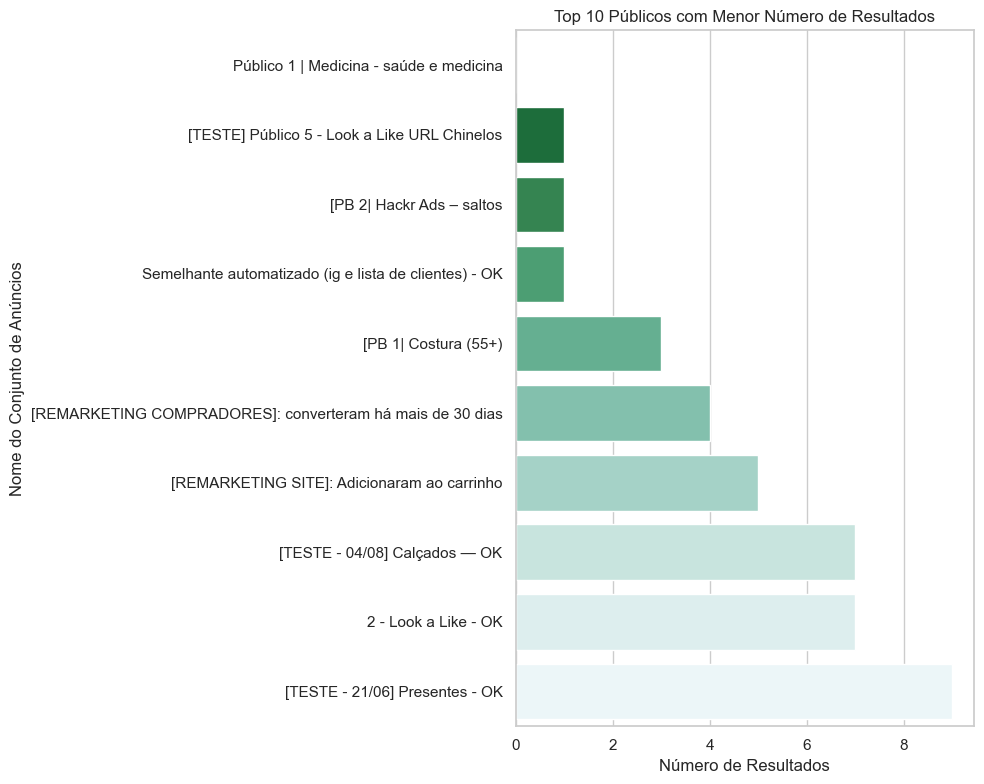

In [54]:
#3. Público com menor número de resultados
resultados_por_publico = data.groupby('Nome do conjunto de anúncios')['Resultados'].sum().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
publico_plot = sns.barplot(x=resultados_por_publico.values, y=resultados_por_publico.index, palette="BuGn_r")
plt.title('Top 10 Públicos com Menor Número de Resultados')
plt.xlabel('Número de Resultados')
plt.ylabel('Nome do Conjunto de Anúncios')
plt.tight_layout()

# Salvando o gráfico
file_path_publico = 'C:\FCD\grafico_publico_resultados.png'
plt.savefig(file_path_publico)

file_path_publico

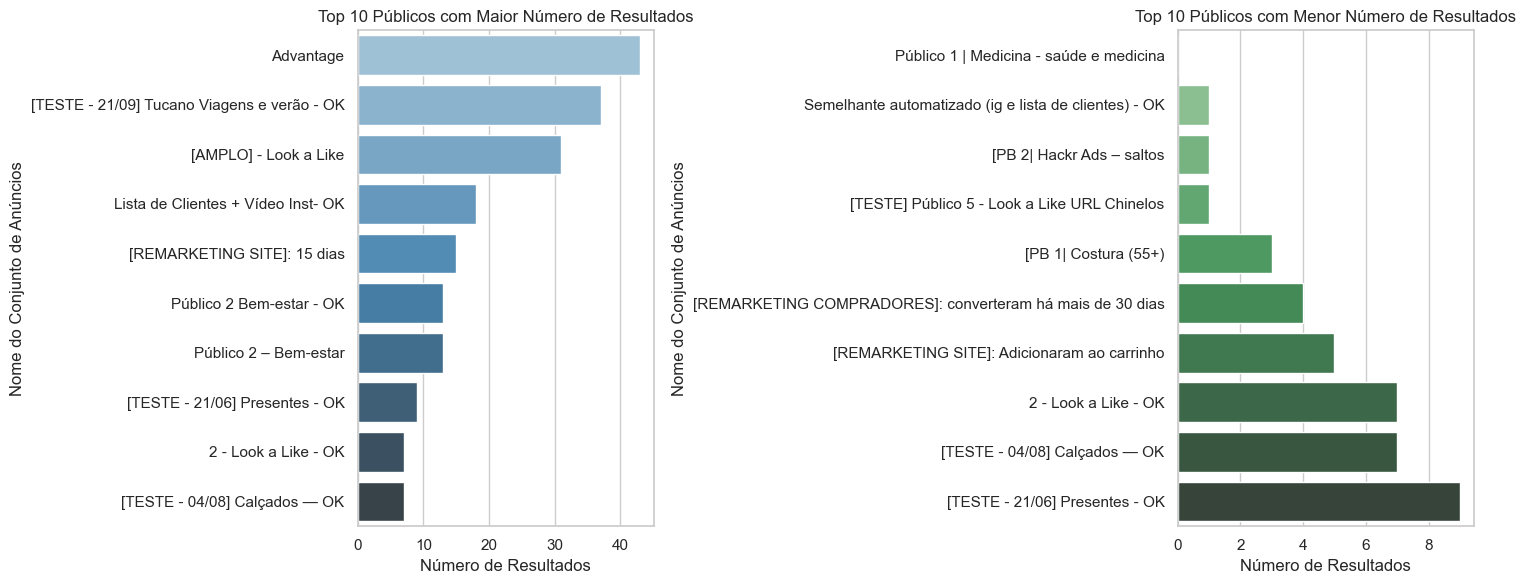

In [24]:
resultados_por_publico = data.groupby('Nome do conjunto de anúncios')['Resultados'].sum()

# Separando os públicos com maior e menor número de resultados
top_publicos_maior_resultado = resultados_por_publico.nlargest(10)
top_publicos_menor_resultado = resultados_por_publico.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico dos públicos com maior número de resultados
sns.barplot(ax=ax1, x=top_publicos_maior_resultado.values, y=top_publicos_maior_resultado.index, palette="Blues_d")
ax1.set_title('Top 10 Públicos com Maior Número de Resultados')
ax1.set_xlabel('Número de Resultados')
ax1.set_ylabel('Nome do Conjunto de Anúncios')

# Gráfico dos públicos com menor número de resultados
sns.barplot(ax=ax2, x=top_publicos_menor_resultado.values, y=top_publicos_menor_resultado.index, palette="Greens_d")
ax2.set_title('Top 10 Públicos com Menor Número de Resultados')
ax2.set_xlabel('Número de Resultados')
ax2.set_ylabel('Nome do Conjunto de Anúncios')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

'C:\\FCD\\grafico_custo_medio_publico.png'

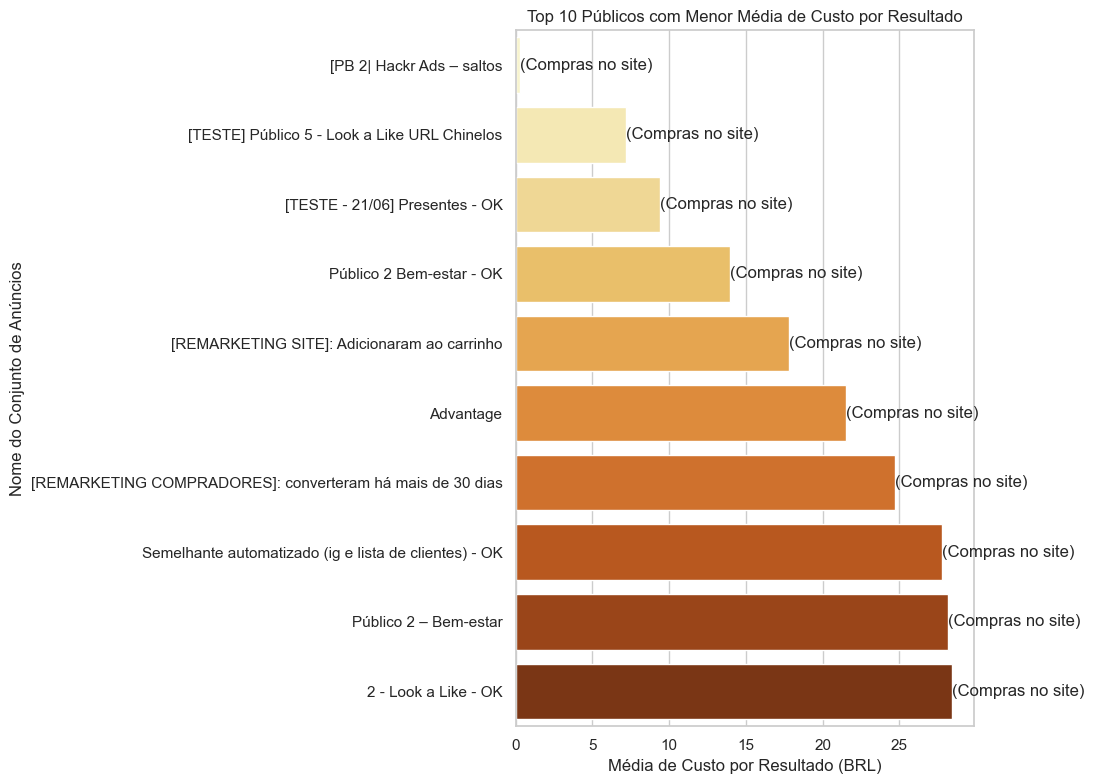

In [56]:
# 4. Público com menor média de custo por resultado
# Primeiro, calculamos a média de custo por resultado para cada público
custo_medio_por_publico = data.groupby('Nome do conjunto de anúncios')['Custo por resultado'].mean().sort_values(ascending=True).head(10)

# Agora, obtemos os tipos de resultado mais comuns para cada público selecionado
tipos_resultado_por_publico = data[data['Nome do conjunto de anúncios'].isin(custo_medio_por_publico.index)].groupby('Nome do conjunto de anúncios')['Tipo de resultado'].agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else None)

# Criando o gráfico
plt.figure(figsize=(10, 8))
custo_publico_plot = sns.barplot(x=custo_medio_por_publico.values, y=custo_medio_por_publico.index, palette="YlOrBr")
plt.title('Top 10 Públicos com Menor Média de Custo por Resultado')
plt.xlabel('Média de Custo por Resultado (BRL)')
plt.ylabel('Nome do Conjunto de Anúncios')
plt.tight_layout()

# Adicionando os tipos de resultado como texto no gráfico
for index, value in enumerate(custo_medio_por_publico.index):
    tipo_resultado = tipos_resultado_por_publico[value]
    plt.text(custo_medio_por_publico[value], index, f"({tipo_resultado})", va='center')

# Salvando o gráfico
file_path_custo_publico = 'C:\FCD\grafico_custo_medio_publico.png'
plt.savefig(file_path_custo_publico)

file_path_custo_publico

'C:\\FCD\\grafico_custo_medio_publico.png'

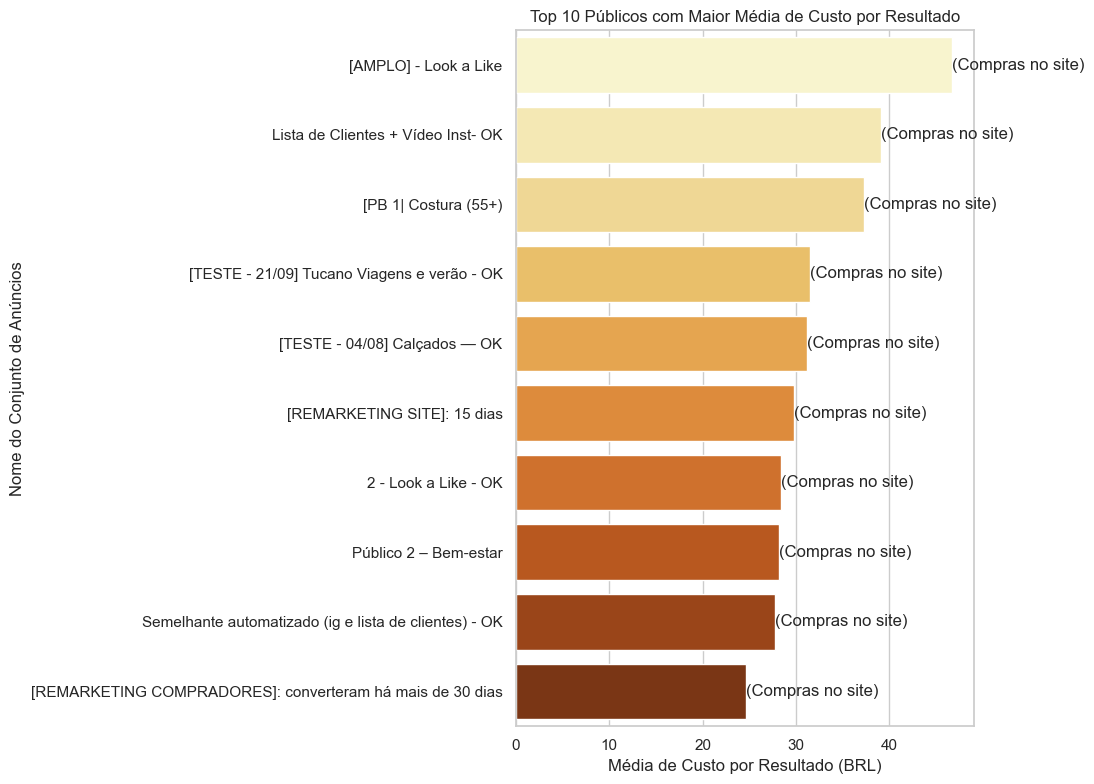

In [57]:
# 4. Público com maior média de custo por resultado
# Primeiro, calculamos a média de custo por resultado para cada público
custo_medio_por_publico = data.groupby('Nome do conjunto de anúncios')['Custo por resultado'].mean().sort_values(ascending=False).head(10)

# Agora, obtemos os tipos de resultado mais comuns para cada público selecionado
tipos_resultado_por_publico = data[data['Nome do conjunto de anúncios'].isin(custo_medio_por_publico.index)].groupby('Nome do conjunto de anúncios')['Tipo de resultado'].agg(lambda x: x.value_counts().index[0] if not x.value_counts().empty else None)

# Criando o gráfico
plt.figure(figsize=(10, 8))
custo_publico_plot = sns.barplot(x=custo_medio_por_publico.values, y=custo_medio_por_publico.index, palette="YlOrBr")
plt.title('Top 10 Públicos com Maior Média de Custo por Resultado')
plt.xlabel('Média de Custo por Resultado (BRL)')
plt.ylabel('Nome do Conjunto de Anúncios')
plt.tight_layout()

# Adicionando os tipos de resultado como texto no gráfico
for index, value in enumerate(custo_medio_por_publico.index):
    tipo_resultado = tipos_resultado_por_publico[value]
    plt.text(custo_medio_por_publico[value], index, f"({tipo_resultado})", va='center')

# Salvando o gráfico
file_path_custo_publico = 'C:\FCD\grafico_custo_medio_publico.png'
plt.savefig(file_path_custo_publico)

file_path_custo_publico

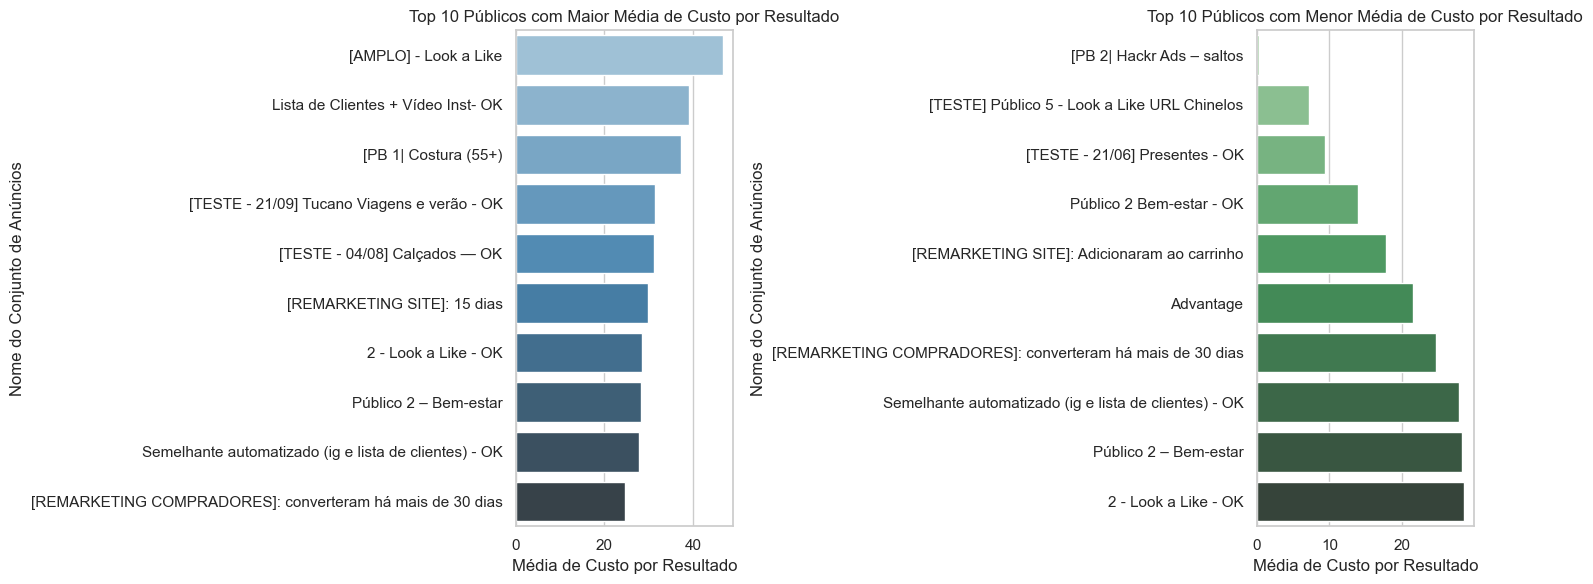

In [27]:
# Calculando a média de custo por resultado para cada público
custo_medio_por_publico = data.groupby('Nome do conjunto de anúncios')['Custo por resultado'].mean()

# Separando os públicos com maior e menor média de custo por resultado
top_publicos_maior_custo = custo_medio_por_publico.nlargest(10)
top_publicos_menor_custo = custo_medio_por_publico.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico dos públicos com maior média de custo por resultado
sns.barplot(ax=ax1, x=top_publicos_maior_custo.values, y=top_publicos_maior_custo.index, palette="Blues_d")
ax1.set_title('Top 10 Públicos com Maior Média de Custo por Resultado')
ax1.set_xlabel('Média de Custo por Resultado')
ax1.set_ylabel('Nome do Conjunto de Anúncios')

# Gráfico dos públicos com menor média de custo por resultado
sns.barplot(ax=ax2, x=top_publicos_menor_custo.values, y=top_publicos_menor_custo.index, palette="Greens_d")
ax2.set_title('Top 10 Públicos com Menor Média de Custo por Resultado')
ax2.set_xlabel('Média de Custo por Resultado')
ax2.set_ylabel('Nome do Conjunto de Anúncios')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

'C:\\FCD\\grafico_valor_gasto_anuncios.png'

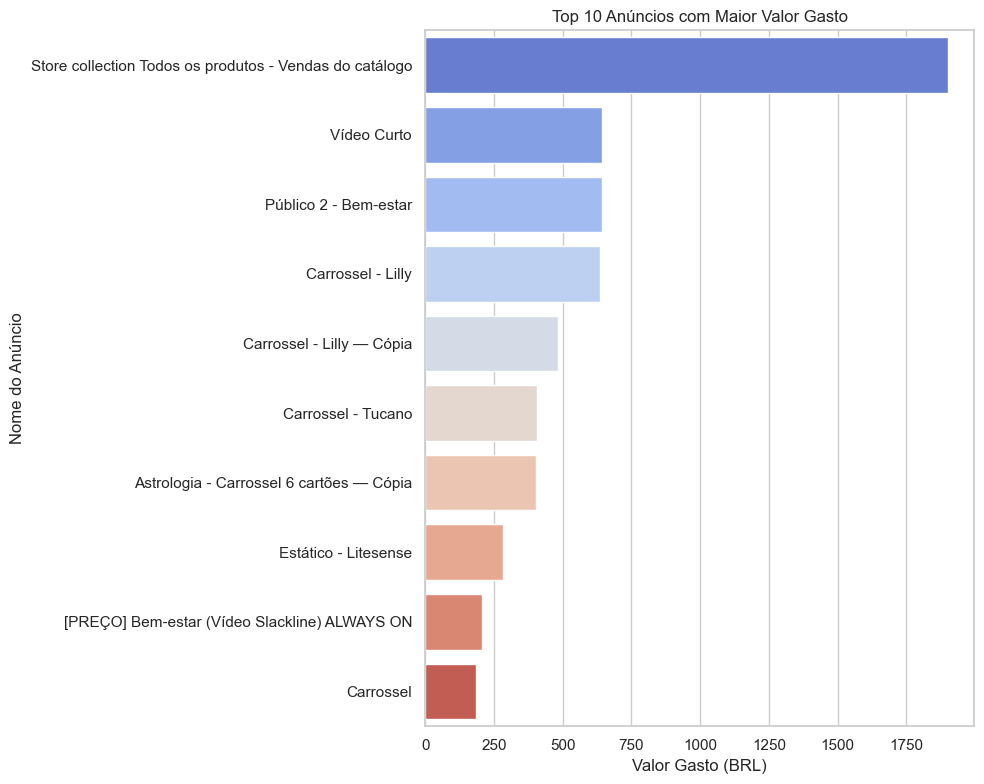

In [28]:
# 1. Anúncios com maior valor gasto
valor_gasto_por_anuncio = data.groupby('Nome do anúncio')['Valor usado (BRL)'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
valor_gasto_plot = sns.barplot(x=valor_gasto_por_anuncio.values, y=valor_gasto_por_anuncio.index, palette="coolwarm")
plt.title('Top 10 Anúncios com Maior Valor Gasto')
plt.xlabel('Valor Gasto (BRL)')
plt.ylabel('Nome do Anúncio')
plt.tight_layout()

# Salvando o gráfico
file_path_valor_gasto = 'C:\FCD\grafico_valor_gasto_anuncios.png'
plt.savefig(file_path_valor_gasto)

file_path_valor_gasto

'C:\\FCD\\grafico_resultados_anuncios.png'

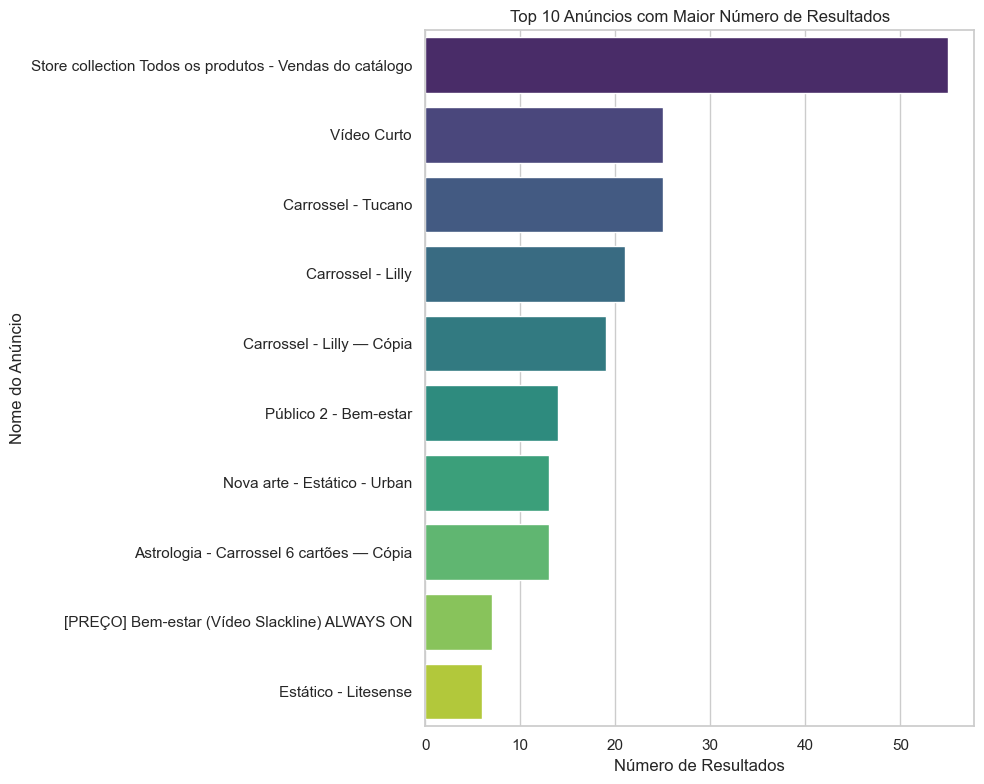

In [29]:
# 2. Anúncios com maior número de resultados
resultados_por_anuncio = data.groupby('Nome do anúncio')['Resultados'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
resultados_plot = sns.barplot(x=resultados_por_anuncio.values, y=resultados_por_anuncio.index, palette="viridis")
plt.title('Top 10 Anúncios com Maior Número de Resultados')
plt.xlabel('Número de Resultados')
plt.ylabel('Nome do Anúncio')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\FCD\grafico_resultados_anuncios.png'
plt.savefig(file_path_resultados)

file_path_resultados

'C:\\FCD\\grafico_resultados_anuncios.png'

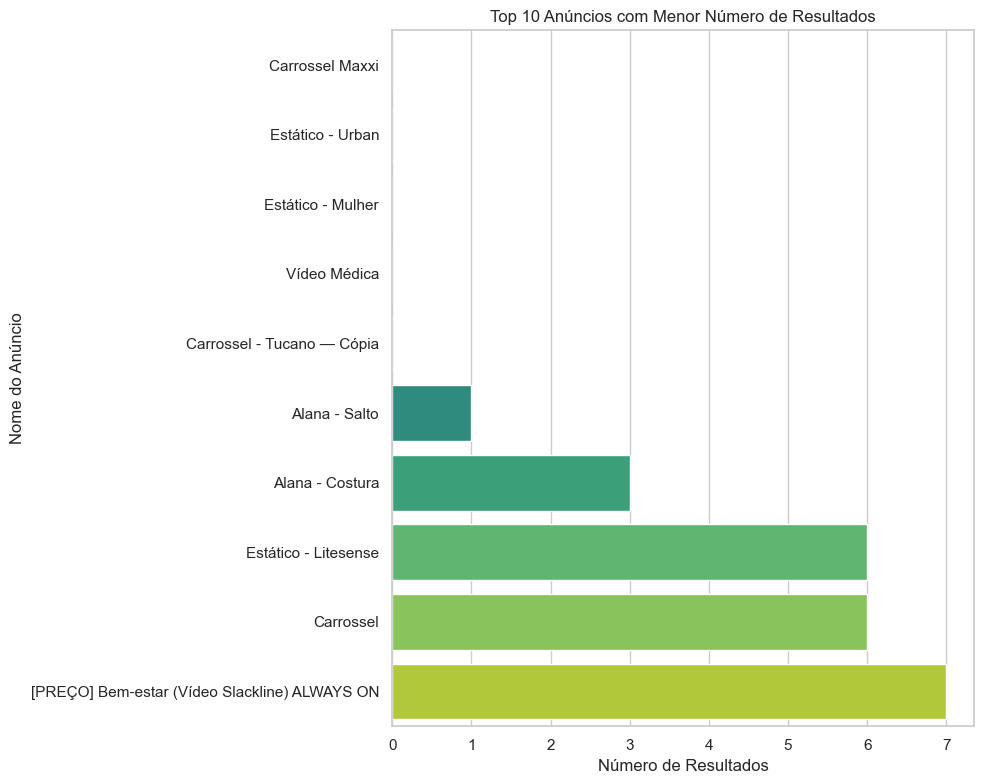

In [30]:
# 2. Anúncios com menor número de resultados
resultados_por_anuncio = data.groupby('Nome do anúncio')['Resultados'].sum().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
resultados_plot = sns.barplot(x=resultados_por_anuncio.values, y=resultados_por_anuncio.index, palette="viridis")
plt.title('Top 10 Anúncios com Menor Número de Resultados')
plt.xlabel('Número de Resultados')
plt.ylabel('Nome do Anúncio')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\FCD\grafico_resultados_anuncios.png'
plt.savefig(file_path_resultados)

file_path_resultados

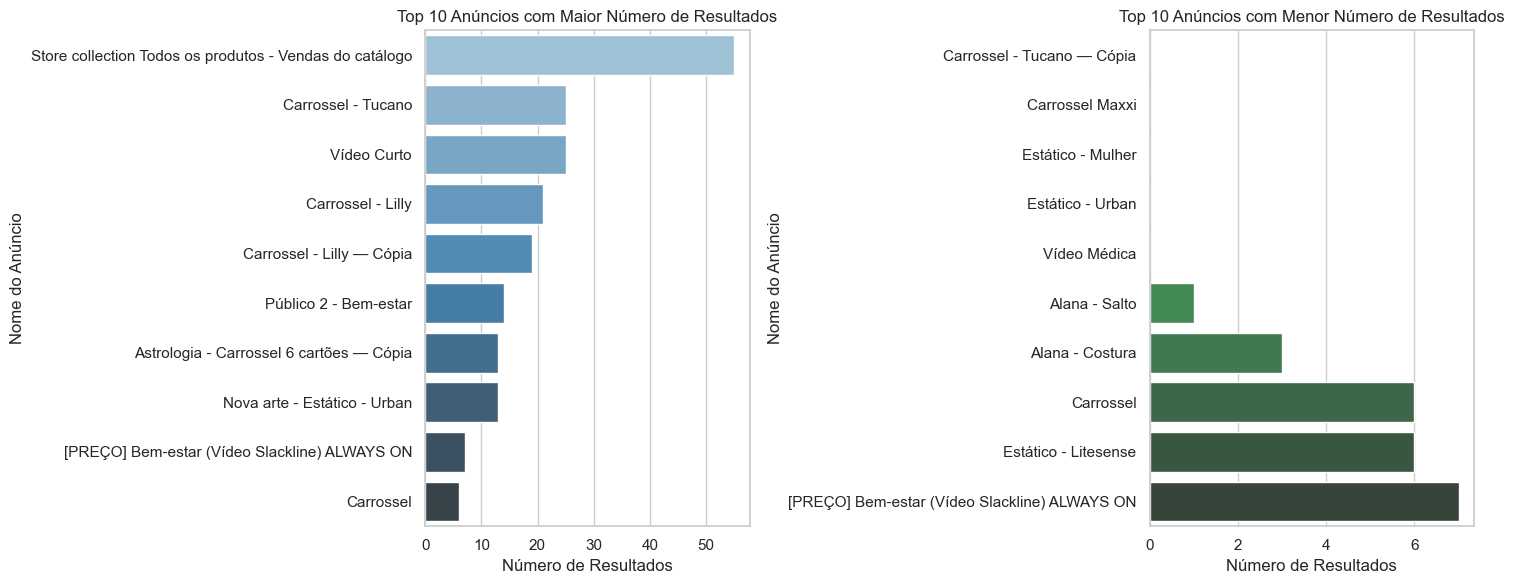

In [31]:
# Calculando o número total de resultados para cada anúncio
resultados_por_anuncio = data.groupby('Nome do anúncio')['Resultados'].sum()

# Separando os anúncios com maior e menor número de resultados
top_anuncios_maior_resultado = resultados_por_anuncio.nlargest(10)
top_anuncios_menor_resultado = resultados_por_anuncio.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico dos anúncios com maior número de resultados
sns.barplot(ax=ax1, x=top_anuncios_maior_resultado.values, y=top_anuncios_maior_resultado.index, palette="Blues_d")
ax1.set_title('Top 10 Anúncios com Maior Número de Resultados')
ax1.set_xlabel('Número de Resultados')
ax1.set_ylabel('Nome do Anúncio')

# Gráfico dos anúncios com menor número de resultados
sns.barplot(ax=ax2, x=top_anuncios_menor_resultado.values, y=top_anuncios_menor_resultado.index, palette="Greens_d")
ax2.set_title('Top 10 Anúncios com Menor Número de Resultados')
ax2.set_xlabel('Número de Resultados')
ax2.set_ylabel('Nome do Anúncio')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

'C:\\FCD\\grafico_custo_medio_anuncios.png'

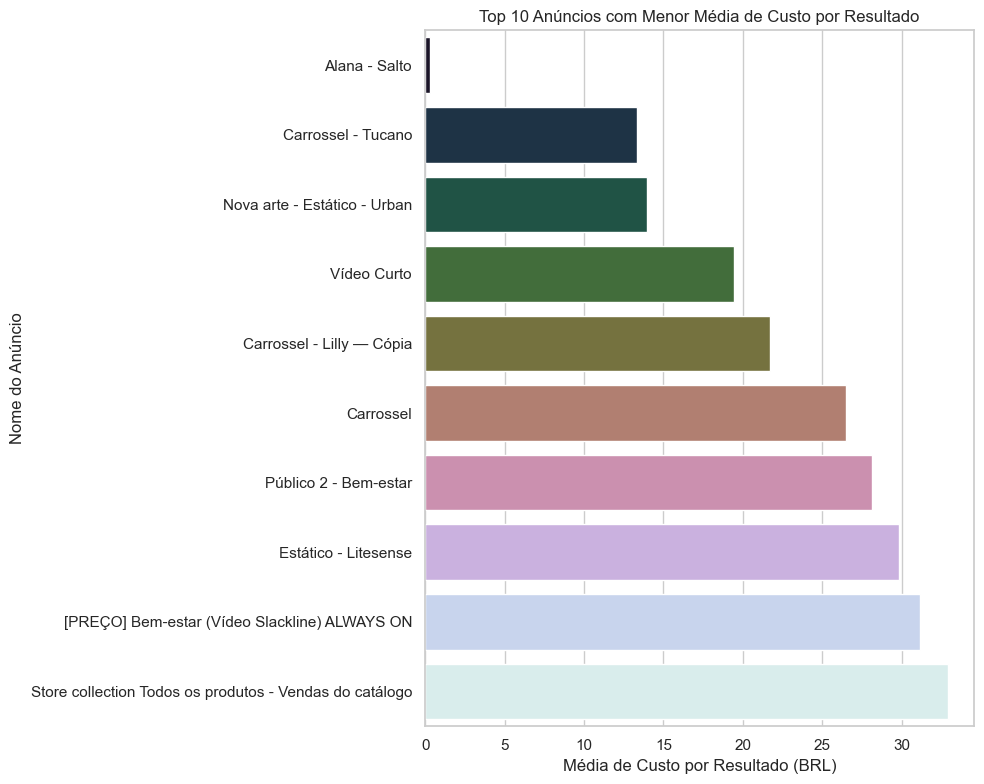

In [32]:
# 3. Anúncios com menor média de custo por resultado
custo_medio_por_anuncio = data.groupby('Nome do anúncio')['Custo por resultado'].mean().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
custo_medio_plot = sns.barplot(x=custo_medio_por_anuncio.values, y=custo_medio_por_anuncio.index, palette="cubehelix")
plt.title('Top 10 Anúncios com Menor Média de Custo por Resultado')
plt.xlabel('Média de Custo por Resultado (BRL)')
plt.ylabel('Nome do Anúncio')
plt.tight_layout()

# Salvando o gráfico
file_path_custo_medio = 'C:\FCD\grafico_custo_medio_anuncios.png'
plt.savefig(file_path_custo_medio)

file_path_custo_medio

'C:\\FCD\\grafico_custo_medio_anuncios.png'

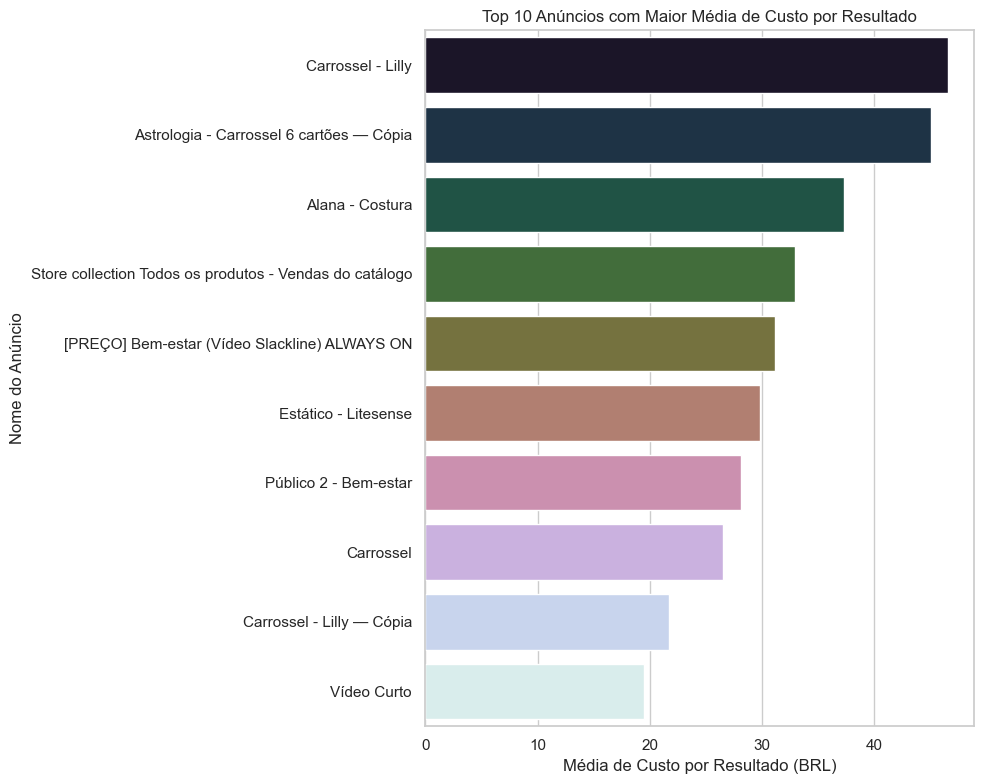

In [33]:
# 3. Anúncios com maior média de custo por resultado
custo_medio_por_anuncio = data.groupby('Nome do anúncio')['Custo por resultado'].mean().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
custo_medio_plot = sns.barplot(x=custo_medio_por_anuncio.values, y=custo_medio_por_anuncio.index, palette="cubehelix")
plt.title('Top 10 Anúncios com Maior Média de Custo por Resultado')
plt.xlabel('Média de Custo por Resultado (BRL)')
plt.ylabel('Nome do Anúncio')
plt.tight_layout()

# Salvando o gráfico
file_path_custo_medio = 'C:\FCD\grafico_custo_medio_anuncios.png'
plt.savefig(file_path_custo_medio)

file_path_custo_medio

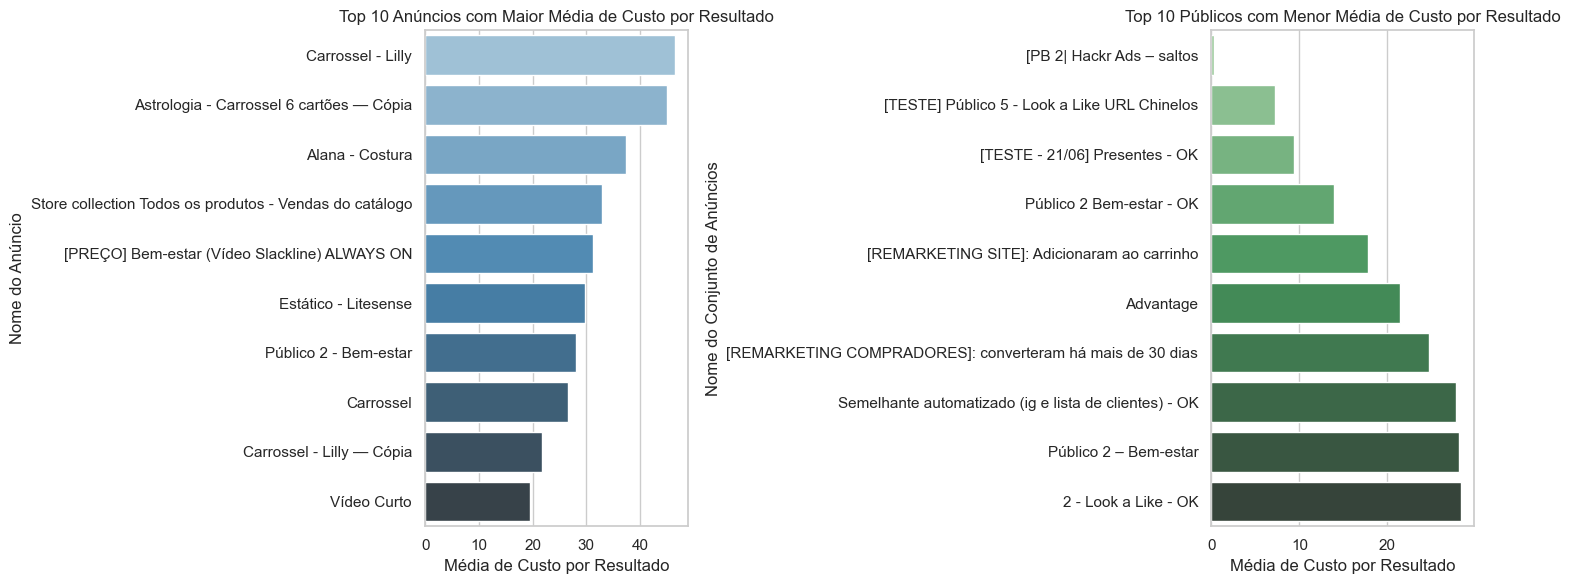

In [34]:
# Calculando a média de custo por resultado para cada anúncio e público
custo_medio_por_anuncio = data.groupby('Nome do anúncio')['Custo por resultado'].mean()
custo_medio_por_publico = data.groupby('Nome do conjunto de anúncios')['Custo por resultado'].mean()

# Separando os anúncios e públicos com maior e menor média de custo por resultado
top_anuncios_maior_custo = custo_medio_por_anuncio.nlargest(10)
top_publicos_menor_custo = custo_medio_por_publico.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico dos anúncios com maior média de custo por resultado
sns.barplot(ax=ax1, x=top_anuncios_maior_custo.values, y=top_anuncios_maior_custo.index, palette="Blues_d")
ax1.set_title('Top 10 Anúncios com Maior Média de Custo por Resultado')
ax1.set_xlabel('Média de Custo por Resultado')
ax1.set_ylabel('Nome do Anúncio')

# Gráfico dos públicos com menor média de custo por resultado
sns.barplot(ax=ax2, x=top_publicos_menor_custo.values, y=top_publicos_menor_custo.index, palette="Greens_d")
ax2.set_title('Top 10 Públicos com Menor Média de Custo por Resultado')
ax2.set_xlabel('Média de Custo por Resultado')
ax2.set_ylabel('Nome do Conjunto de Anúncios')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

'C:\\FCD\\grafico_ctr_anuncios.png'

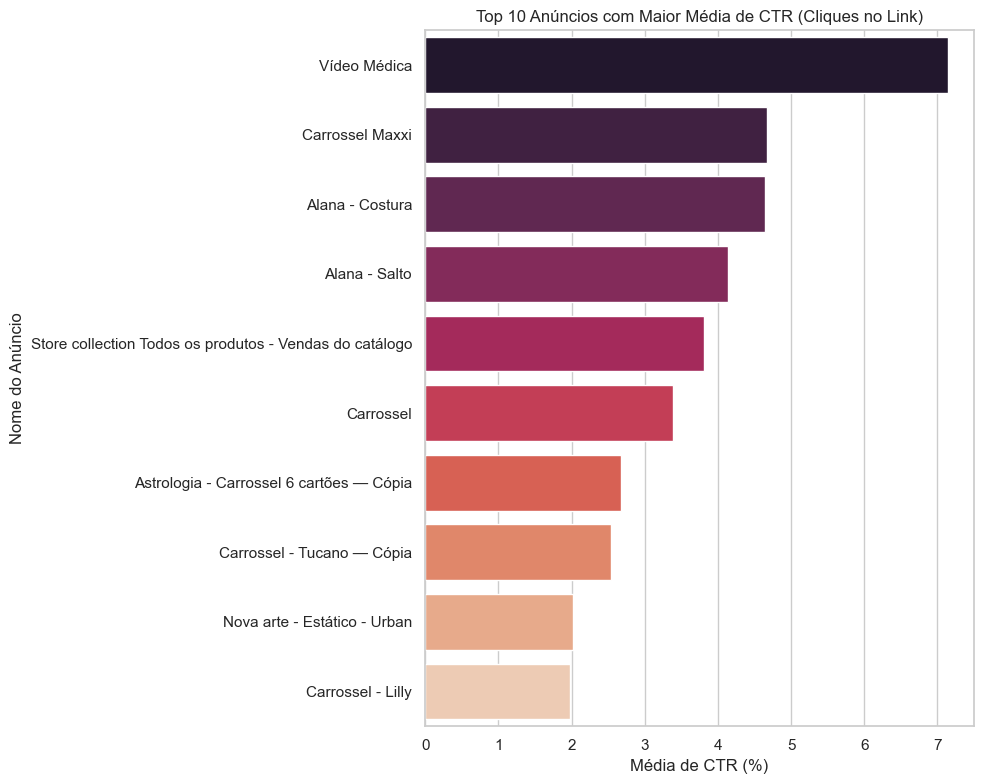

In [61]:
# 4. Anúncios com maior média de CTR (Cliques no link)
ctr_medio_por_anuncio = data.groupby('Nome do anúncio')['CTR (taxa de cliques no link)'].mean().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
ctr_plot = sns.barplot(x=ctr_medio_por_anuncio.values, y=ctr_medio_por_anuncio.index, palette="rocket")
plt.title('Top 10 Anúncios com Maior Média de CTR (Cliques no Link)')
plt.xlabel('Média de CTR (%)')
plt.ylabel('Nome do Anúncio')
plt.tight_layout()

# Salvando o gráfico
file_path_ctr = 'C:\FCD\grafico_ctr_anuncios.png'
plt.savefig(file_path_ctr)

file_path_ctr

'C:\\FCD\\grafico_ctr_anuncios.png'

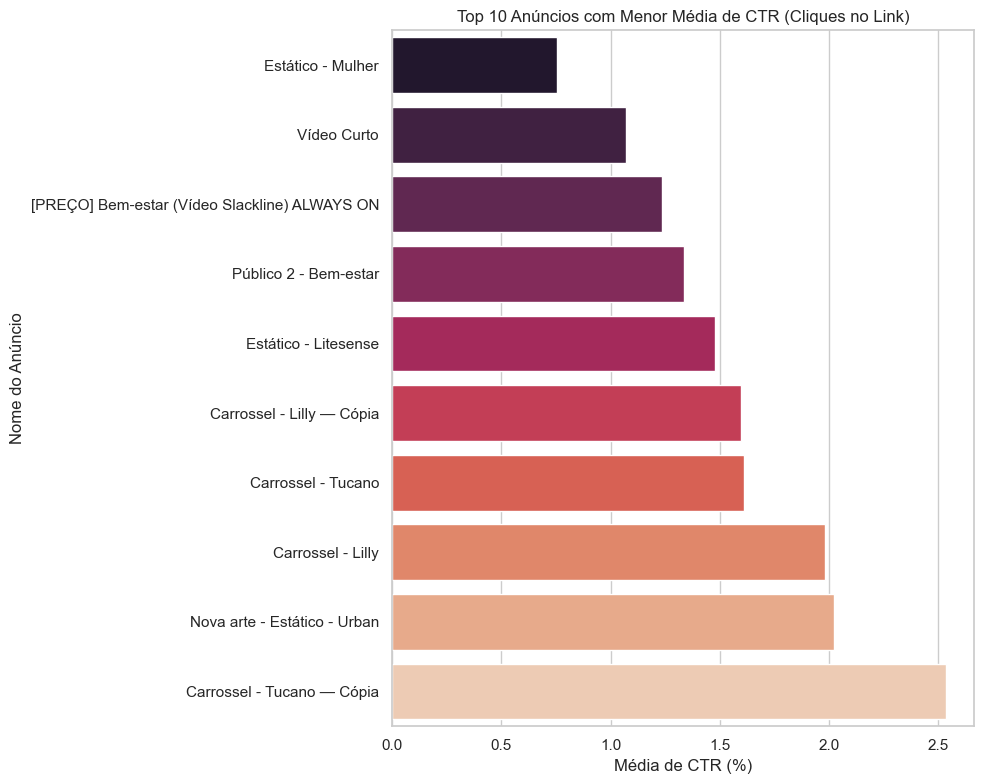

In [36]:
# 4. Anúncios com menor média de CTR (Cliques no link)
ctr_medio_por_anuncio = data.groupby('Nome do anúncio')['CTR (taxa de cliques no link)'].mean().sort_values(ascending=True).head(10)

# Criando o gráfico
plt.figure(figsize=(10, 8))
ctr_plot = sns.barplot(x=ctr_medio_por_anuncio.values, y=ctr_medio_por_anuncio.index, palette="rocket")
plt.title('Top 10 Anúncios com Menor Média de CTR (Cliques no Link)')
plt.xlabel('Média de CTR (%)')
plt.ylabel('Nome do Anúncio')
plt.tight_layout()

# Salvando o gráfico
file_path_ctr = 'C:\FCD\grafico_ctr_anuncios.png'
plt.savefig(file_path_ctr)

file_path_ctr

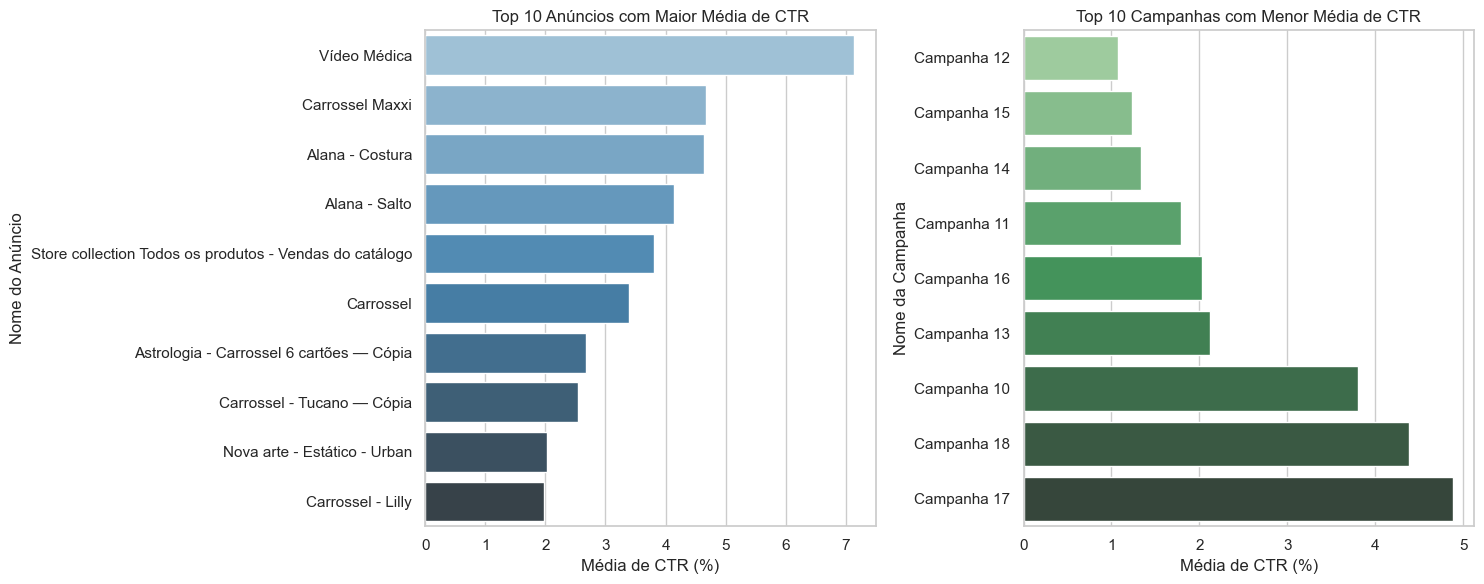

In [37]:
# Calculando a média de CTR para cada anúncio e campanha
ctr_medio_por_anuncio = data.groupby('Nome do anúncio')['CTR (taxa de cliques no link)'].mean()
ctr_medio_por_campanha = data.groupby('Nome da campanha')['CTR (taxa de cliques no link)'].mean()

# Separando os anúncios e campanhas com maior e menor média de CTR
top_anuncios_maior_ctr = ctr_medio_por_anuncio.nlargest(10)
top_campanhas_menor_ctr = ctr_medio_por_campanha.nsmallest(10)

# Criando a figura e os eixos para os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico dos anúncios com maior média de CTR
sns.barplot(ax=ax1, x=top_anuncios_maior_ctr.values, y=top_anuncios_maior_ctr.index, palette="Blues_d")
ax1.set_title('Top 10 Anúncios com Maior Média de CTR')
ax1.set_xlabel('Média de CTR (%)')
ax1.set_ylabel('Nome do Anúncio')

# Gráfico das campanhas com menor média de CTR
sns.barplot(ax=ax2, x=top_campanhas_menor_ctr.values, y=top_campanhas_menor_ctr.index, palette="Greens_d")
ax2.set_title('Top 10 Campanhas com Menor Média de CTR')
ax2.set_xlabel('Média de CTR (%)')
ax2.set_ylabel('Nome da Campanha')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

In [38]:
# Classificando os anúncios em "Carrossel", "Estático" ou "Vídeo"
data['Tipo de Anúncio'] = 'Outro'
data.loc[data['Nome do anúncio'].str.contains('Carrossel', case=False, na=False), 'Tipo de Anúncio'] = 'Carrossel'
data.loc[data['Nome do anúncio'].str.contains('Estático', case=False, na=False), 'Tipo de Anúncio'] = 'Estático'
data.loc[data['Nome do anúncio'].str.contains('Vídeo', case=False, na=False), 'Tipo de Anúncio'] = 'Vídeo'

# Calculando qual tipo de anúncio dá mais resultados
resultados_por_tipo_anuncio = data.groupby('Tipo de Anúncio')['Resultados'].sum().sort_values(ascending=False)

resultados_por_tipo_anuncio

Tipo de Anúncio
Carrossel    84.0
Outro        73.0
Vídeo        32.0
Estático     19.0
Name: Resultados, dtype: float64

'C:\\FCD\\grafico_valor_gasto_tipo_anuncios.png'

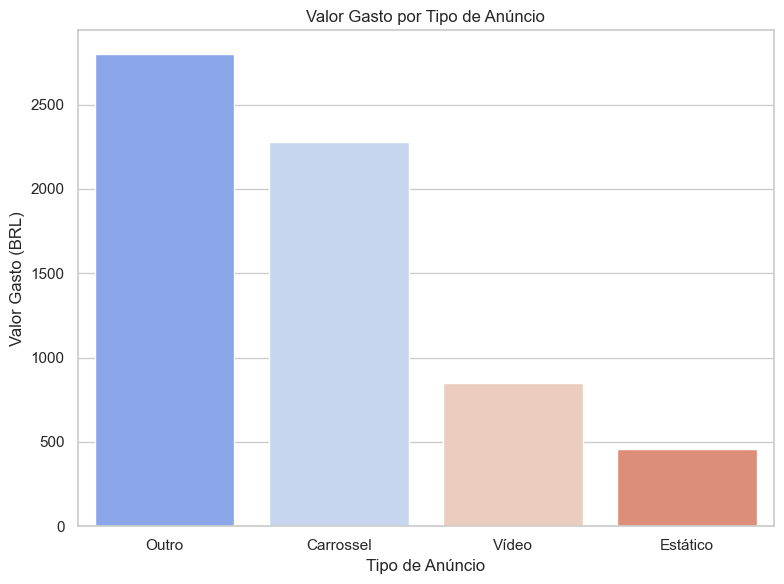

In [58]:
# 1. Tipos de anúncios com maior valor gasto
valor_gasto_por_tipo_anuncio = data.groupby('Tipo de Anúncio')['Valor usado (BRL)'].sum().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(8, 6))
valor_gasto_tipo_plot = sns.barplot(x=valor_gasto_por_tipo_anuncio.index, y=valor_gasto_por_tipo_anuncio.values, palette="coolwarm")
plt.title('Valor Gasto por Tipo de Anúncio')
plt.xlabel('Tipo de Anúncio')
plt.ylabel('Valor Gasto (BRL)')
plt.tight_layout()

# Salvando o gráfico
file_path_valor_gasto_tipo = 'C:\FCD\grafico_valor_gasto_tipo_anuncios.png'
plt.savefig(file_path_valor_gasto_tipo)

file_path_valor_gasto_tipo

'C:\\FCD\\grafico_resultados_tipo_anuncios.png'

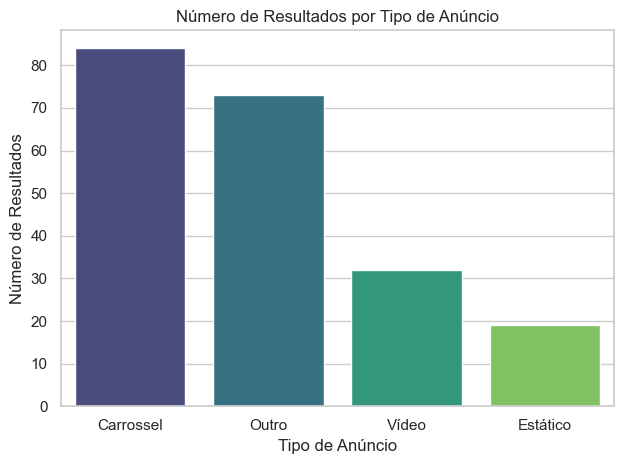

In [59]:
# 2. Tipos de anúncios com maior número de resultados
resultados_tipo_plot = sns.barplot(x=resultados_por_tipo_anuncio.index, y=resultados_por_tipo_anuncio.values, palette="viridis")
plt.title('Número de Resultados por Tipo de Anúncio')
plt.xlabel('Tipo de Anúncio')
plt.ylabel('Número de Resultados')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados_tipo = 'C:\FCD\grafico_resultados_tipo_anuncios.png'
plt.savefig(file_path_resultados_tipo)

file_path_resultados_tipo

'C:\\FCD\\grafico_custo_medio_tipo_anuncios.png'

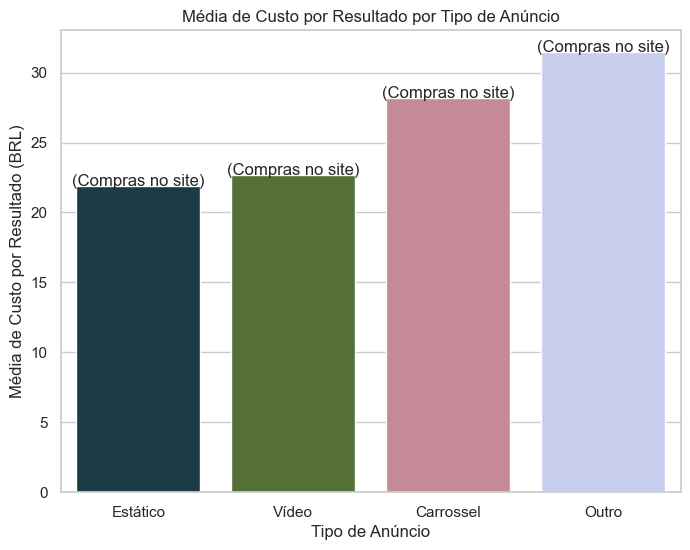

In [60]:
# 3. Tipos de anúncios com menor média de custo por resultado
custo_medio_por_tipo_anuncio = data.groupby('Tipo de Anúncio')['Custo por resultado'].mean().sort_values(ascending=True)
tipos_resultado_por_tipo_anuncio = data.groupby('Tipo de Anúncio')['Tipo de resultado'].agg(lambda x:x.value_counts().index[0])

# Criando o gráfico
plt.figure(figsize=(8, 6))
custo_medio_tipo_plot = sns.barplot(x=custo_medio_por_tipo_anuncio.index, y=custo_medio_por_tipo_anuncio.values, palette="cubehelix")
plt.title('Média de Custo por Resultado por Tipo de Anúncio')
plt.xlabel('Tipo de Anúncio')
plt.ylabel('Média de Custo por Resultado (BRL)')

# Adicionando os tipos de resultado como texto no gráfico
for index, value in enumerate(custo_medio_por_tipo_anuncio.index):
    tipo_resultado = tipos_resultado_por_tipo_anuncio[value]
    x_pos = index
    # Ajustando o valor de y para mover o texto para cima
    # O valor 0.05 é apenas um exemplo, ajuste conforme necessário
    y_pos = custo_medio_por_tipo_anuncio[value] + 0.35

    plt.text(x_pos, y_pos, f"({tipo_resultado})", va='center', ha='center')
    
# Salvando o gráfico
file_path_custo_medio_tipo = 'C:\FCD\grafico_custo_medio_tipo_anuncios.png'
plt.savefig(file_path_custo_medio_tipo)

file_path_custo_medio_tipo

'C:\\FCD\\grafico_ctr_tipo_anuncios.png'

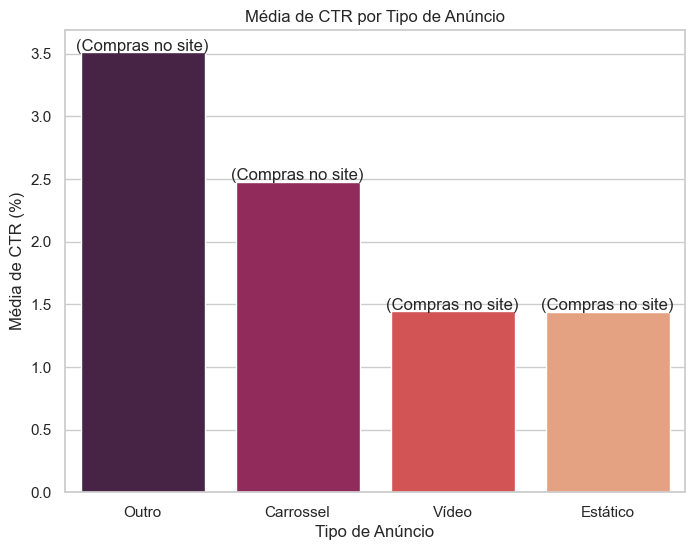

In [62]:
# 4. Tipos de anúncios com maior média de CTR (Cliques no link)
ctr_medio_por_tipo_anuncio = data.groupby('Tipo de Anúncio')['CTR (taxa de cliques no link)'].mean().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(8, 6))
ctr_tipo_plot = sns.barplot(x=ctr_medio_por_tipo_anuncio.index, y=ctr_medio_por_tipo_anuncio.values, palette="rocket")
plt.title('Média de CTR por Tipo de Anúncio')
plt.xlabel('Tipo de Anúncio')
plt.ylabel('Média de CTR (%)')

for index, value in enumerate(ctr_medio_por_tipo_anuncio.index):
    tipo_resultado = tipos_resultado_por_tipo_anuncio[value]
    x_pos = index
    # Ajustando o valor de y para mover o texto para cima
    # O valor 0.05 é apenas um exemplo, ajuste conforme necessário
    y_pos = ctr_medio_por_tipo_anuncio[value] + 0.05

    plt.text(x_pos, y_pos, f"({tipo_resultado})", va='center', ha='center')

# Salvando o gráfico
file_path_ctr_tipo = 'C:\FCD\grafico_ctr_tipo_anuncios.png'
plt.savefig(file_path_ctr_tipo)

file_path_ctr_tipo


In [43]:
# Calculando a média de custo por resultado e o valor total usado para cada campanha
custo_medio_por_campanha = data.groupby('Nome da campanha')['Custo por resultado'].mean()
valor_usado_por_campanha = data.groupby('Nome da campanha')['Valor usado (BRL)'].sum()

# Combinando as duas métricas em um DataFrame
analise_campanhas = pd.DataFrame({
    'Custo Médio por Resultado': custo_medio_por_campanha,
    'Valor Usado Total': valor_usado_por_campanha
}).reset_index()

# Ordenando as campanhas pelo custo médio por resultado e depois pelo valor usado
analise_campanhas.sort_values(by=['Custo Médio por Resultado', 'Valor Usado Total'], ascending=[True, True], inplace=True)

# Identificando campanhas eficientes
# Campanhas com baixo custo por resultado e menor valor usado do que outras campanhas de custo mais alto
campanhas_eficientes = []
for i, campanha in analise_campanhas.iterrows():
    campanhas_mais_caras = analise_campanhas[(analise_campanhas['Custo Médio por Resultado'] > campanha['Custo Médio por Resultado']) & 
                                             (analise_campanhas['Valor Usado Total'] > campanha['Valor Usado Total'])]
    if not campanhas_mais_caras.empty:
        campanhas_eficientes.append(campanha['Nome da campanha'])

# Convertendo a lista em um DataFrame para melhor visualização
campanhas_eficientes_df = pd.DataFrame(campanhas_eficientes, columns=['Campanhas Eficientes'])
campanhas_eficientes_df

,Campanhas Eficientes
0,Campanha 16
1,Campanha 12
2,Campanha 11
3,Campanha 18
4,Campanha 14
5,Campanha 15


In [44]:
# Calculando a média de CTR e o total de resultados para cada campanha
ctr_medio_por_campanha = data.groupby('Nome da campanha')['CTR (taxa de cliques no link)'].mean()
resultados_por_campanha = data.groupby('Nome da campanha')['Resultados'].sum()

# Combinando as duas métricas em um DataFrame
analise_ctr_campanhas = pd.DataFrame({
    'CTR Médio': ctr_medio_por_campanha,
    'Total de Resultados': resultados_por_campanha
}).reset_index()

# Identificando campanhas com CTR alto e menos resultados
# em comparação a campanhas com CTR menor e mais resultados
campanhas_otimizacao = analise_ctr_campanhas[
    (analise_ctr_campanhas['CTR Médio'] > analise_ctr_campanhas['CTR Médio'].median()) & 
    (analise_ctr_campanhas['Total de Resultados'] < analise_ctr_campanhas['Total de Resultados'].median())
]

campanhas_otimizacao

,Nome da campanha,CTR Médio,Total de Resultados
7,Campanha 17,4.876799,0.0
8,Campanha 18,4.378941,4.0
